#  Data Analysis with Python

In [10]:
import pandas as pd 
import numpy as np
from scipy.stats import *
import matplotlib as mpl

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import mplcyberpunk
%matplotlib inline

pd.set_option("display.max_columns", 100) 
pd.set_option("display.max_rows", 100) 

plt.style.use("cyberpunk")

import warnings
warnings.filterwarnings("ignore") 

In [2]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.0
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5.0
mpl.rcParams["axes.titlepad"] = 10.0
mpl.rcParams['xtick.labelsize'] =15
mpl.rcParams["legend.fontsize"] = 15
mpl.rcParams['ytick.labelsize'] = 15

In [11]:
train = pd.read_csv("/storage/emulated/0/Hr analytics/train.csv") 
test = pd.read_csv("/storage/emulated/0/Hr analytics/test.csv") 

## Univariat & Bivariat Analysis

In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB


In [7]:
pd.DataFrame({"Train/null":(train.isnull().sum()/train.shape[0])*100,
              "Test/null": (test.isnull().sum()/test.shape[0])*100}).sort_values("Train/null", ascending=False) 

,Train/null,Test/null
previous_year_rating,7.524449,7.713921
education,4.395344,4.401873
KPIs_met >80%,0.000000,0.000000
age,0.000000,0.000000
avg_training_score,0.000000,0.000000
awards_won?,0.000000,0.000000
department,0.000000,0.000000
employee_id,0.000000,0.000000
gender,0.000000,0.000000
is_promoted,0.000000,NaN


In [8]:
print(f"data duplicated: {train.duplicated().sum()}")

data duplicated: 0


In [ ]:
#target

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

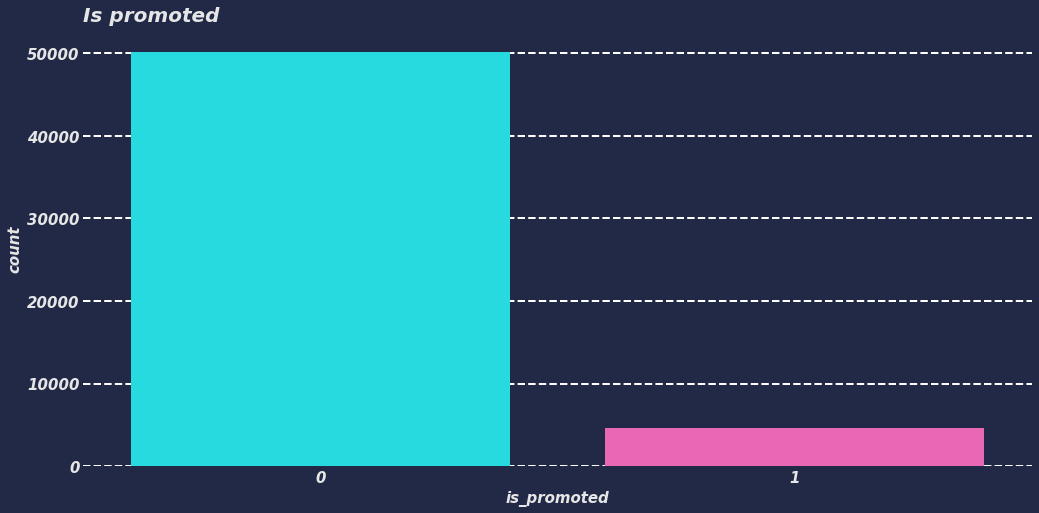

In [13]:
plt.figure(figsize=(17,8))
sns.countplot(train.is_promoted) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 
plt.title("Is promoted")

train.is_promoted.value_counts(normalize=True)

In [12]:
cater = train.select_dtypes("object").columns
number = train.select_dtypes("number").drop("is_promoted", axis=1).columns

In [ ]:
#Categorical features

In [16]:
train[cater].describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [19]:
#departement
train.department.value_counts().to_frame() 

,department
Sales & Marketing,16840
Operations,11348
Procurement,7138
Technology,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


Text(0.0, 1.0, 'Department distribution')

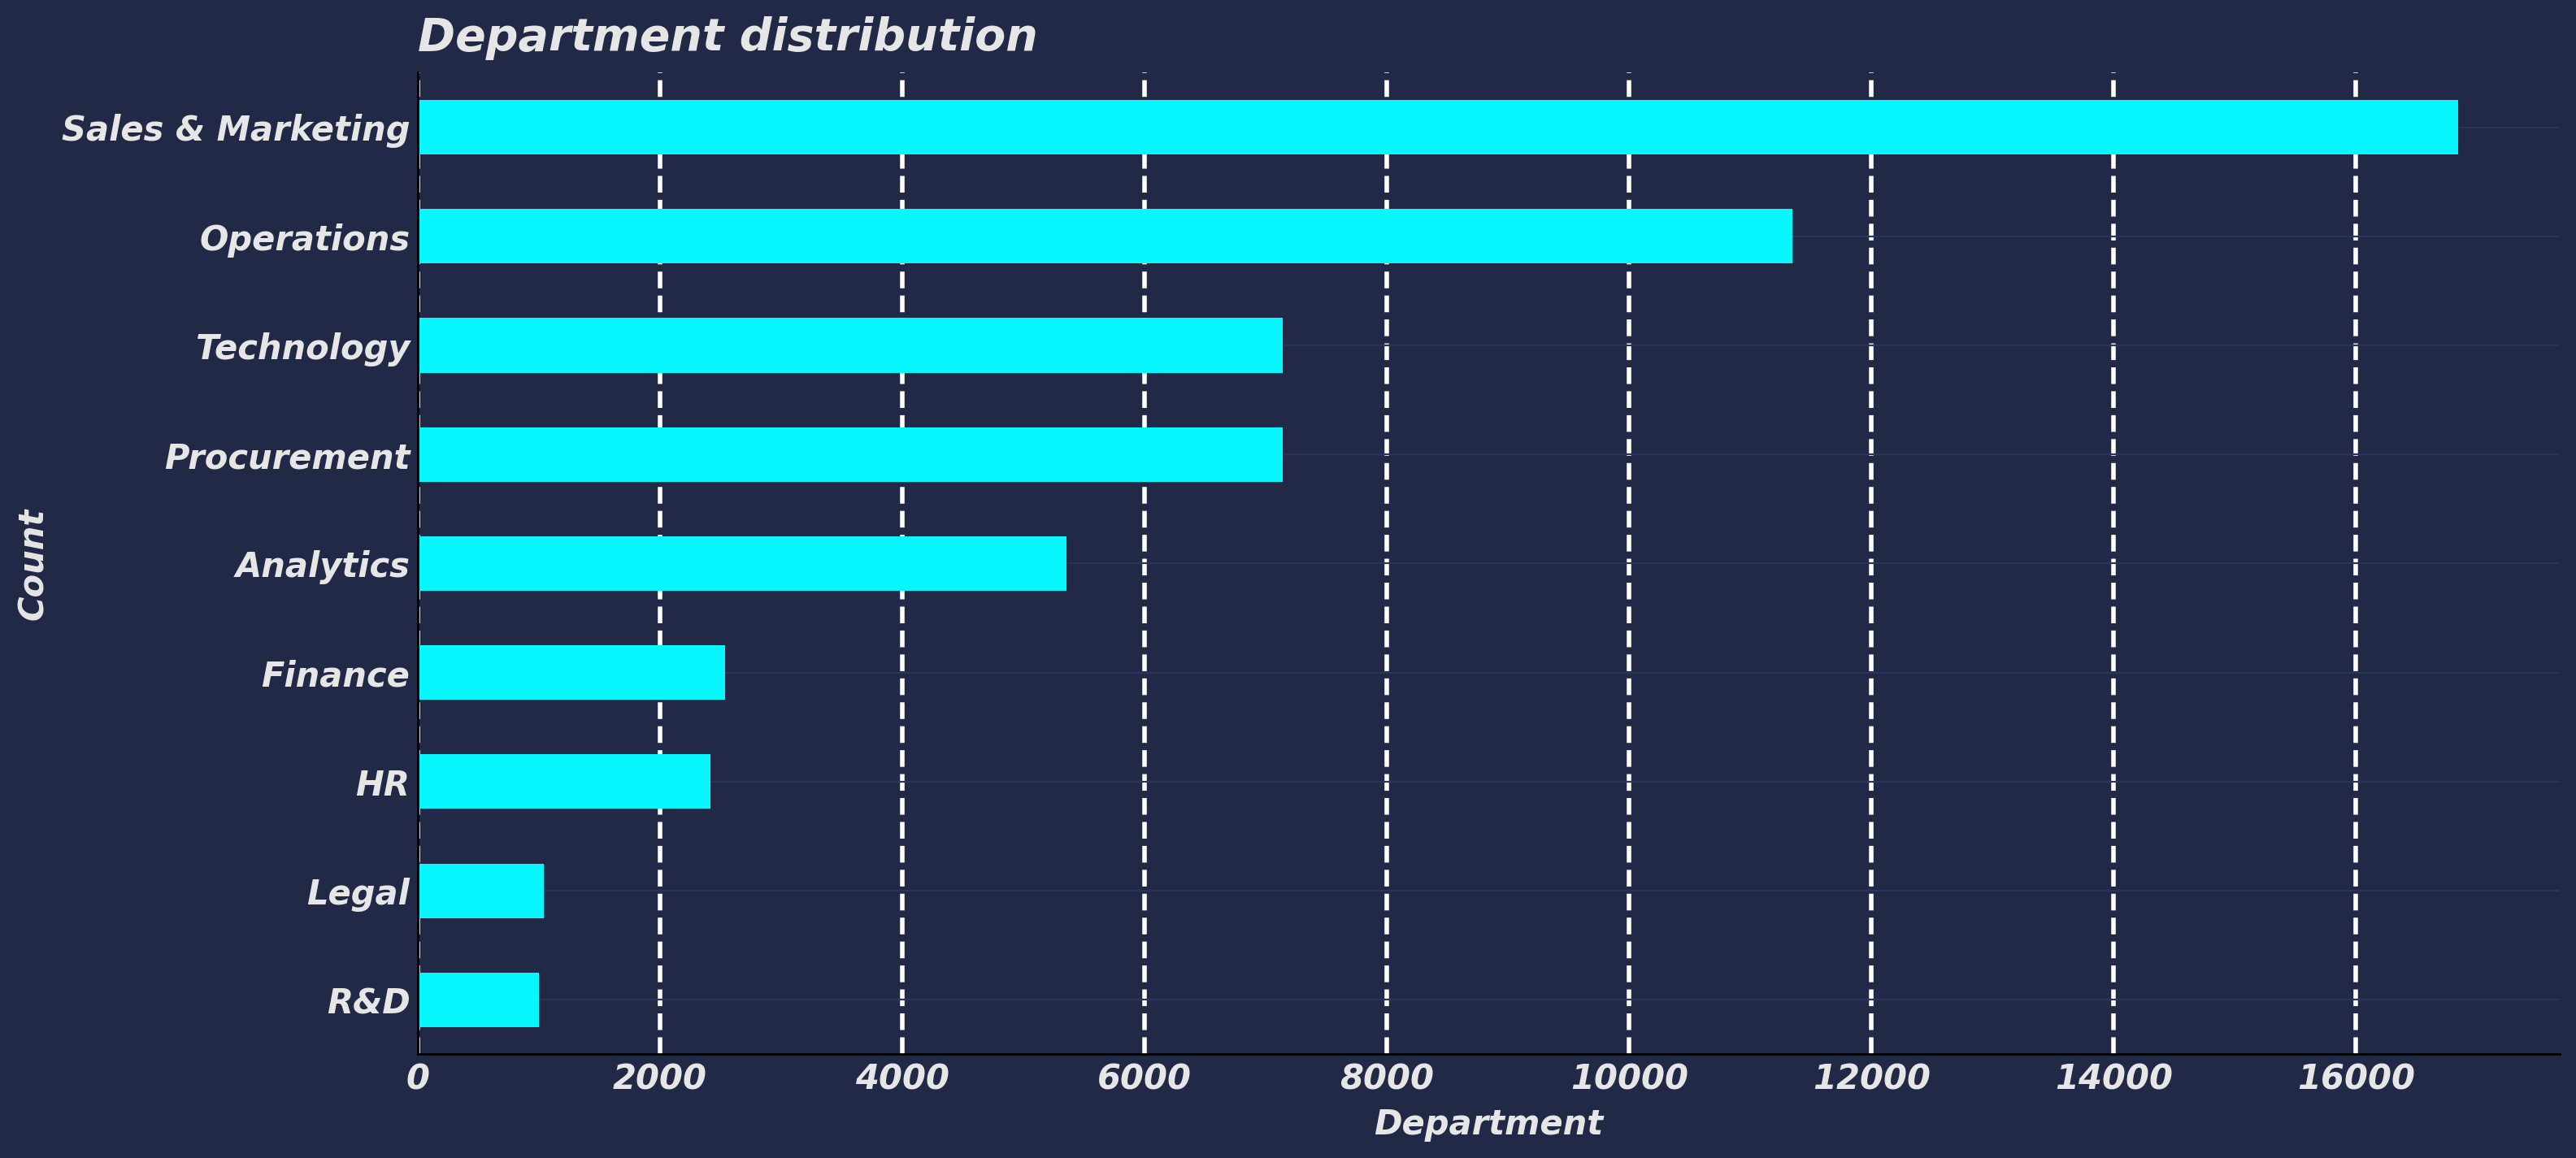

In [50]:
train.department.value_counts().sort_values(ascending=True).plot(kind="barh",figsize=(17,8))
plt.grid(axis="x", linewidth=2, linestyle="--", color="white") 

plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Department distribution")


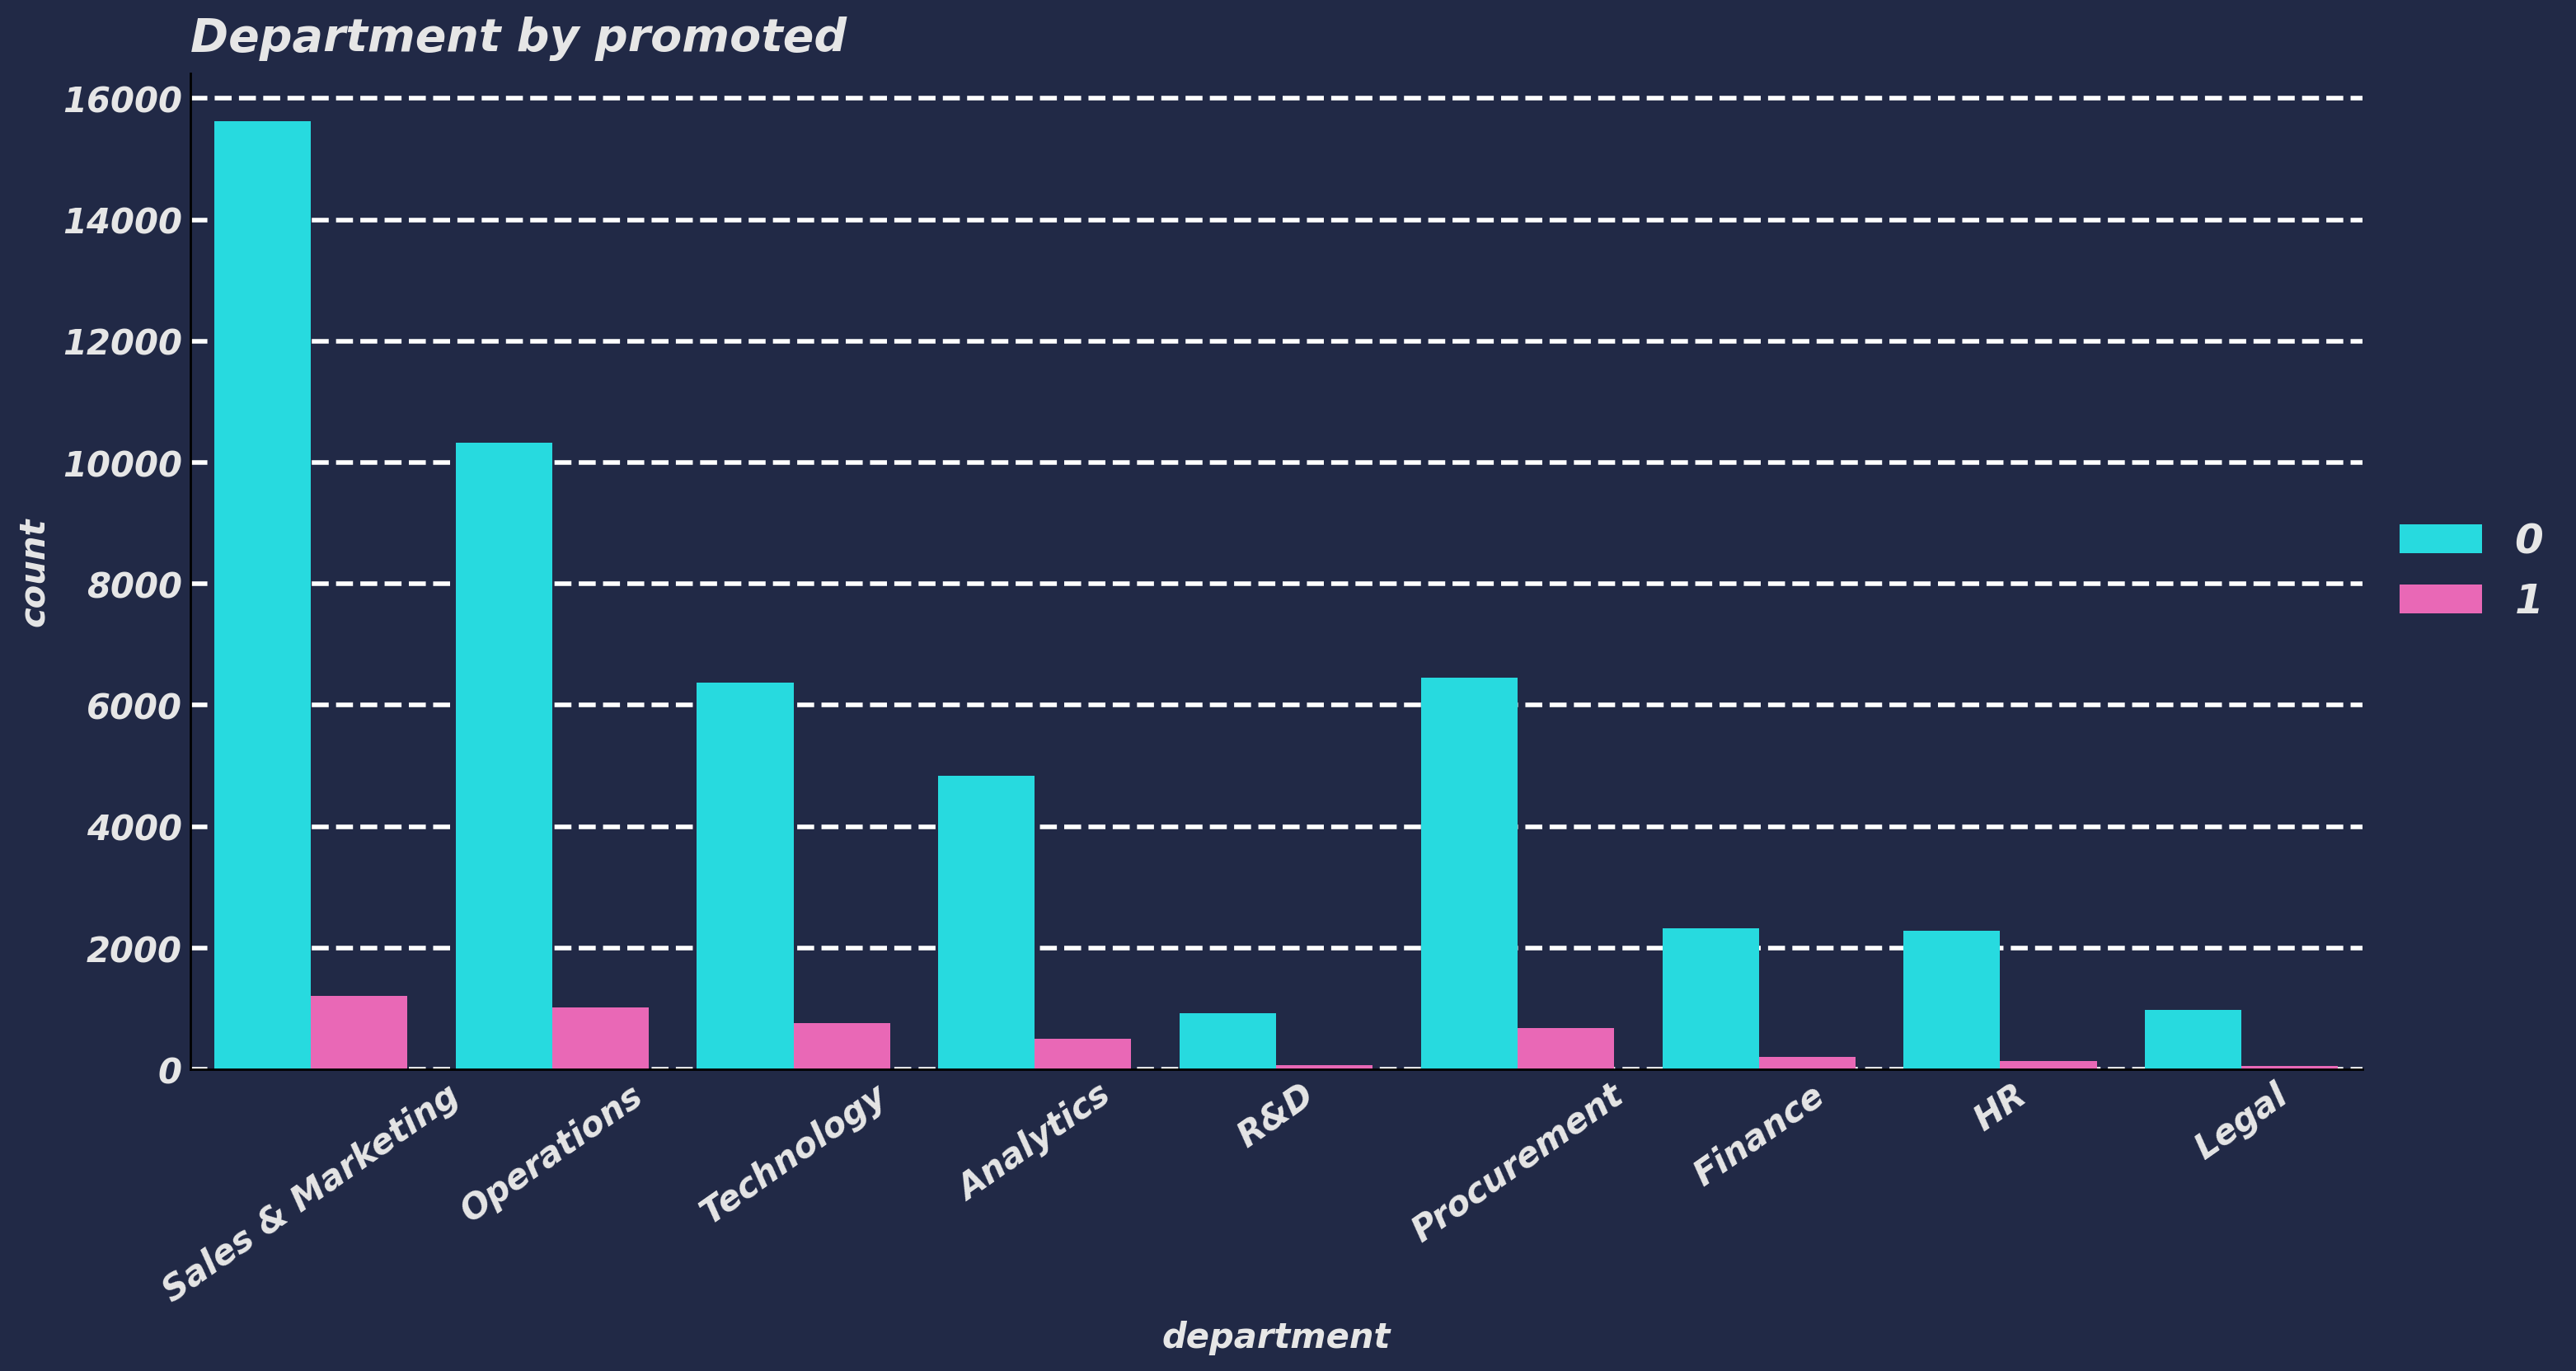

In [41]:
plt.figure(figsize=(17,8))
sns.countplot(train.department,hue=train.is_promoted) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.xticks(rotation=35) 
plt.title("Department by promoted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

In [44]:
train.groupby("department")["is_promoted"].mean().to_frame() 

,is_promoted
department,
Analytics,0.095665
Finance,0.081230
HR,0.056245
Legal,0.051011
Operations,0.090148
Procurement,0.096386
R&D,0.069069
Sales & Marketing,0.072031
Technology,0.107593


In [45]:
#region
train.region.value_counts().to_frame() 

,region
region_2,12343
region_22,6428
region_7,4843
region_15,2808
region_13,2648
region_26,2260
region_31,1935
region_4,1703
region_27,1659
region_16,1465


Text(0.0, 1.0, 'Region distribution')

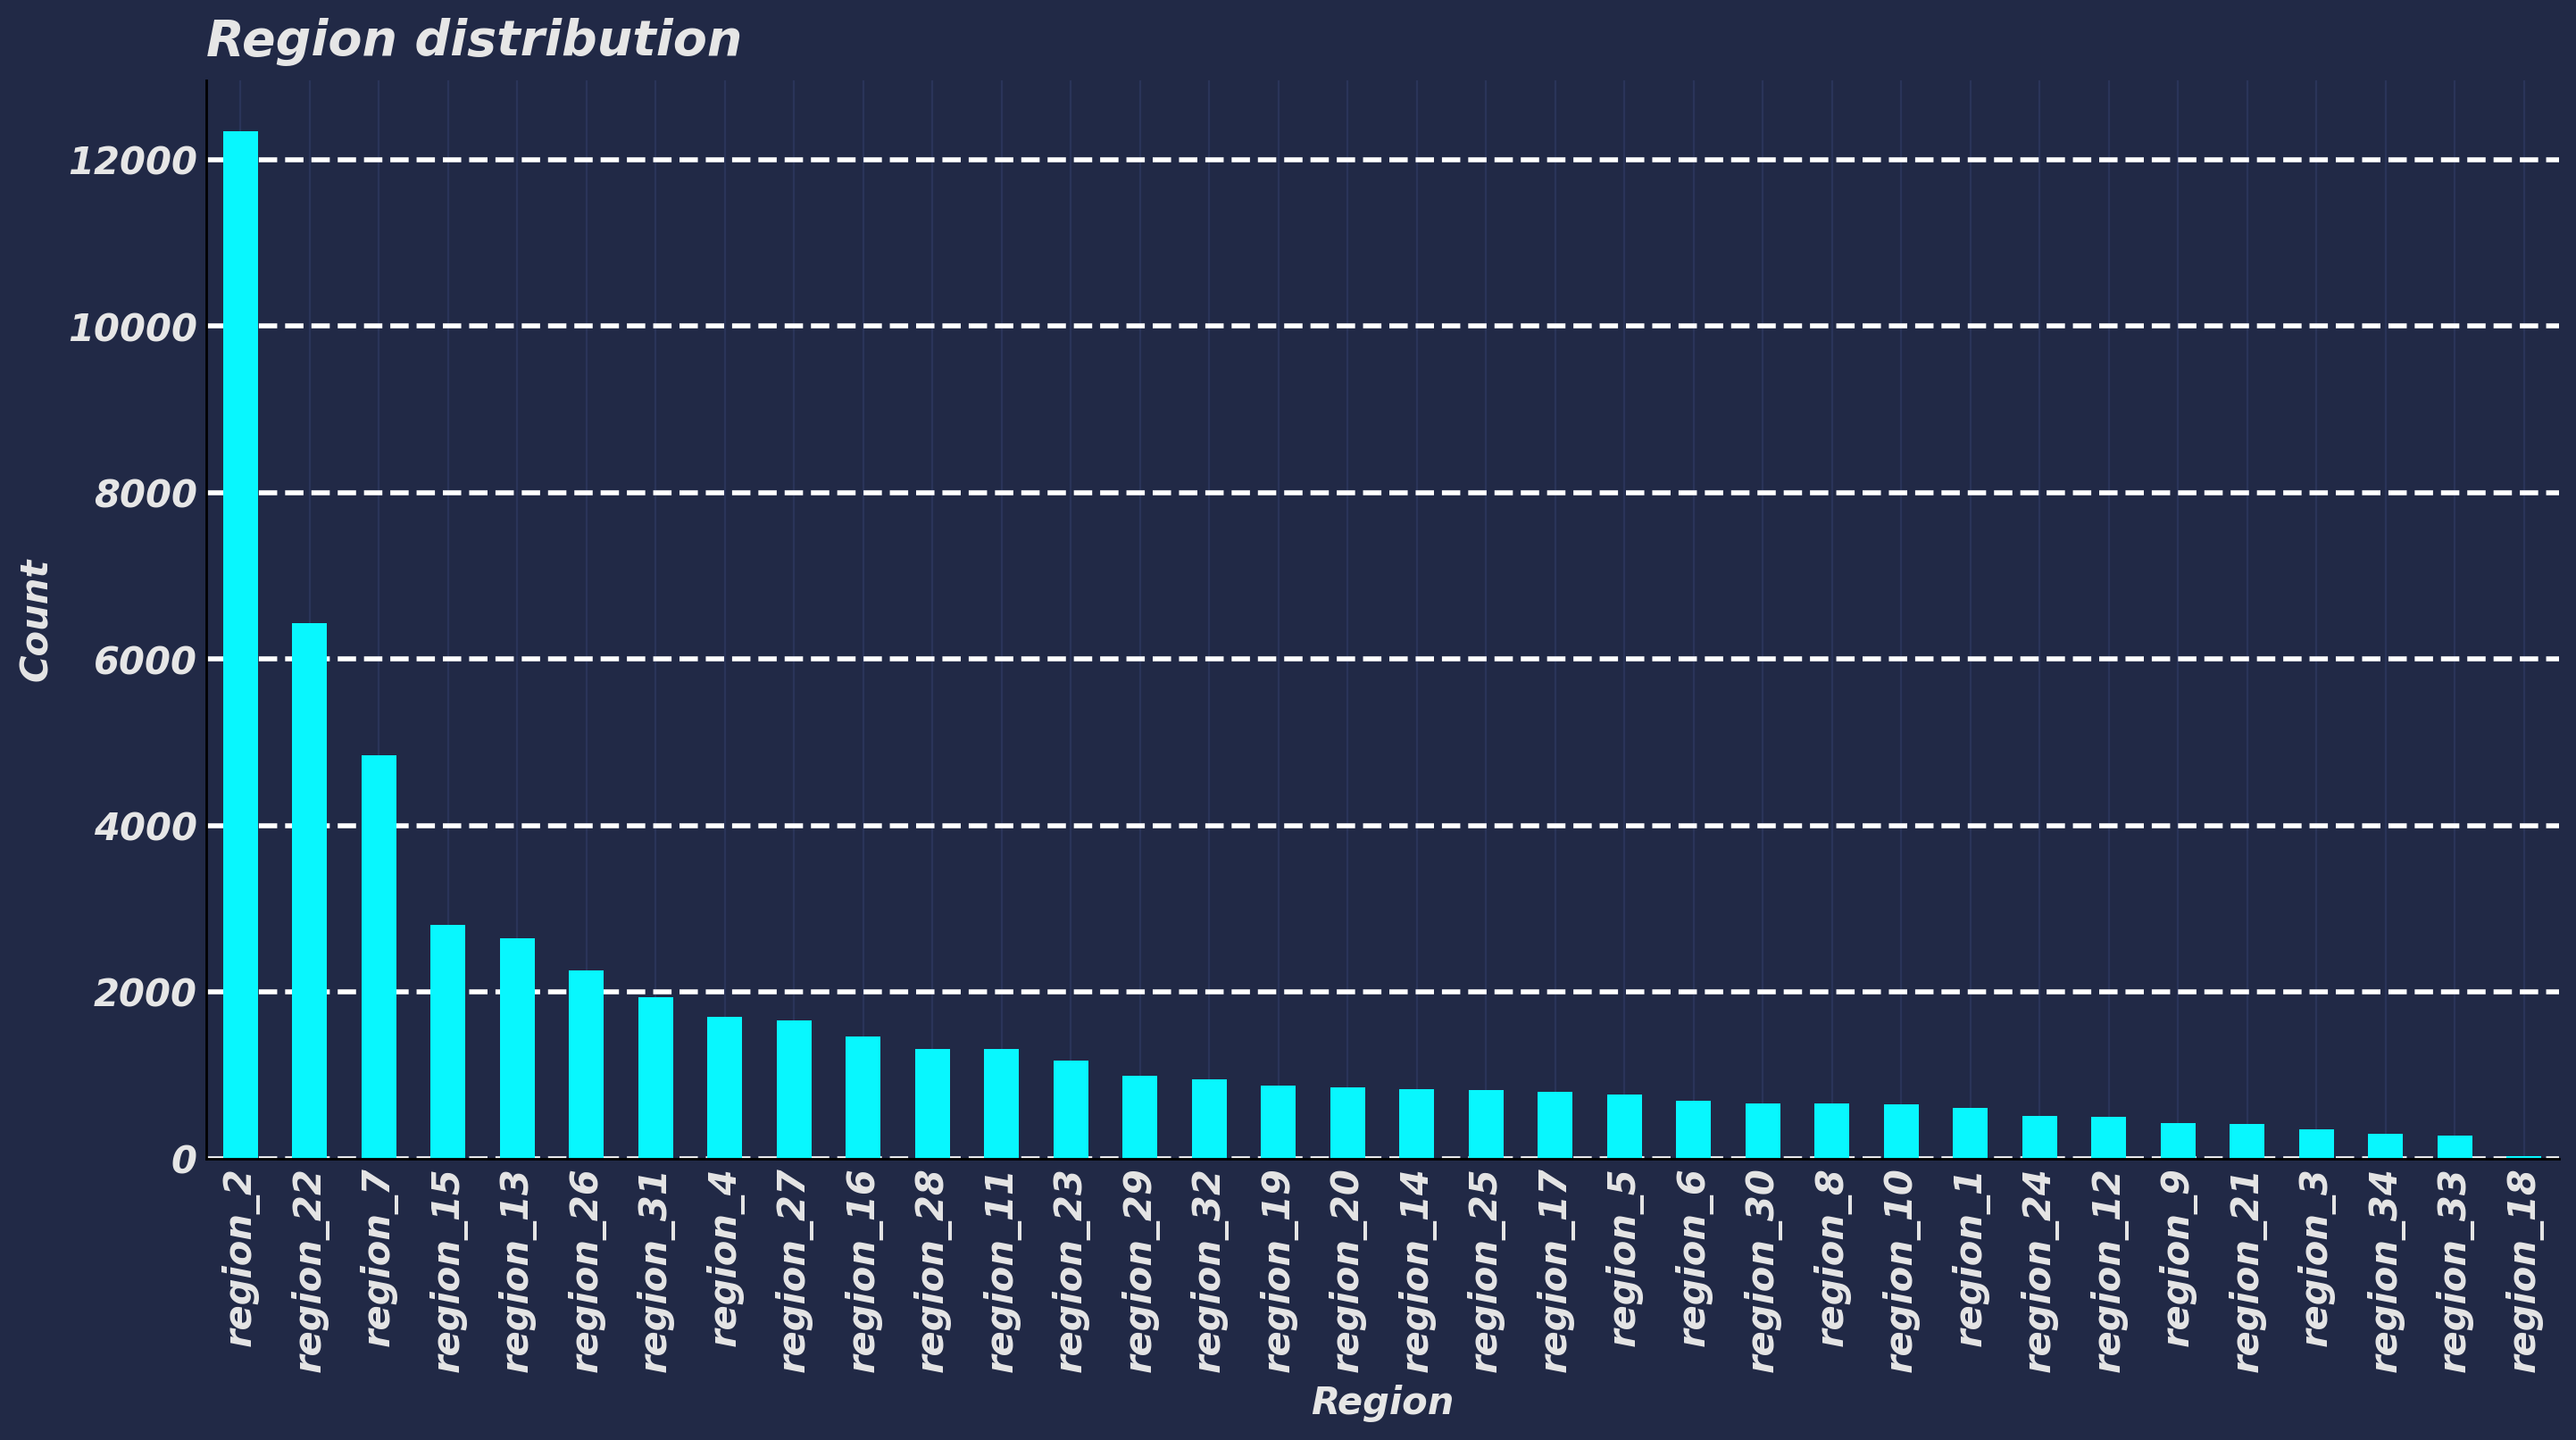

In [46]:
train.region.value_counts().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 

plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region distribution")


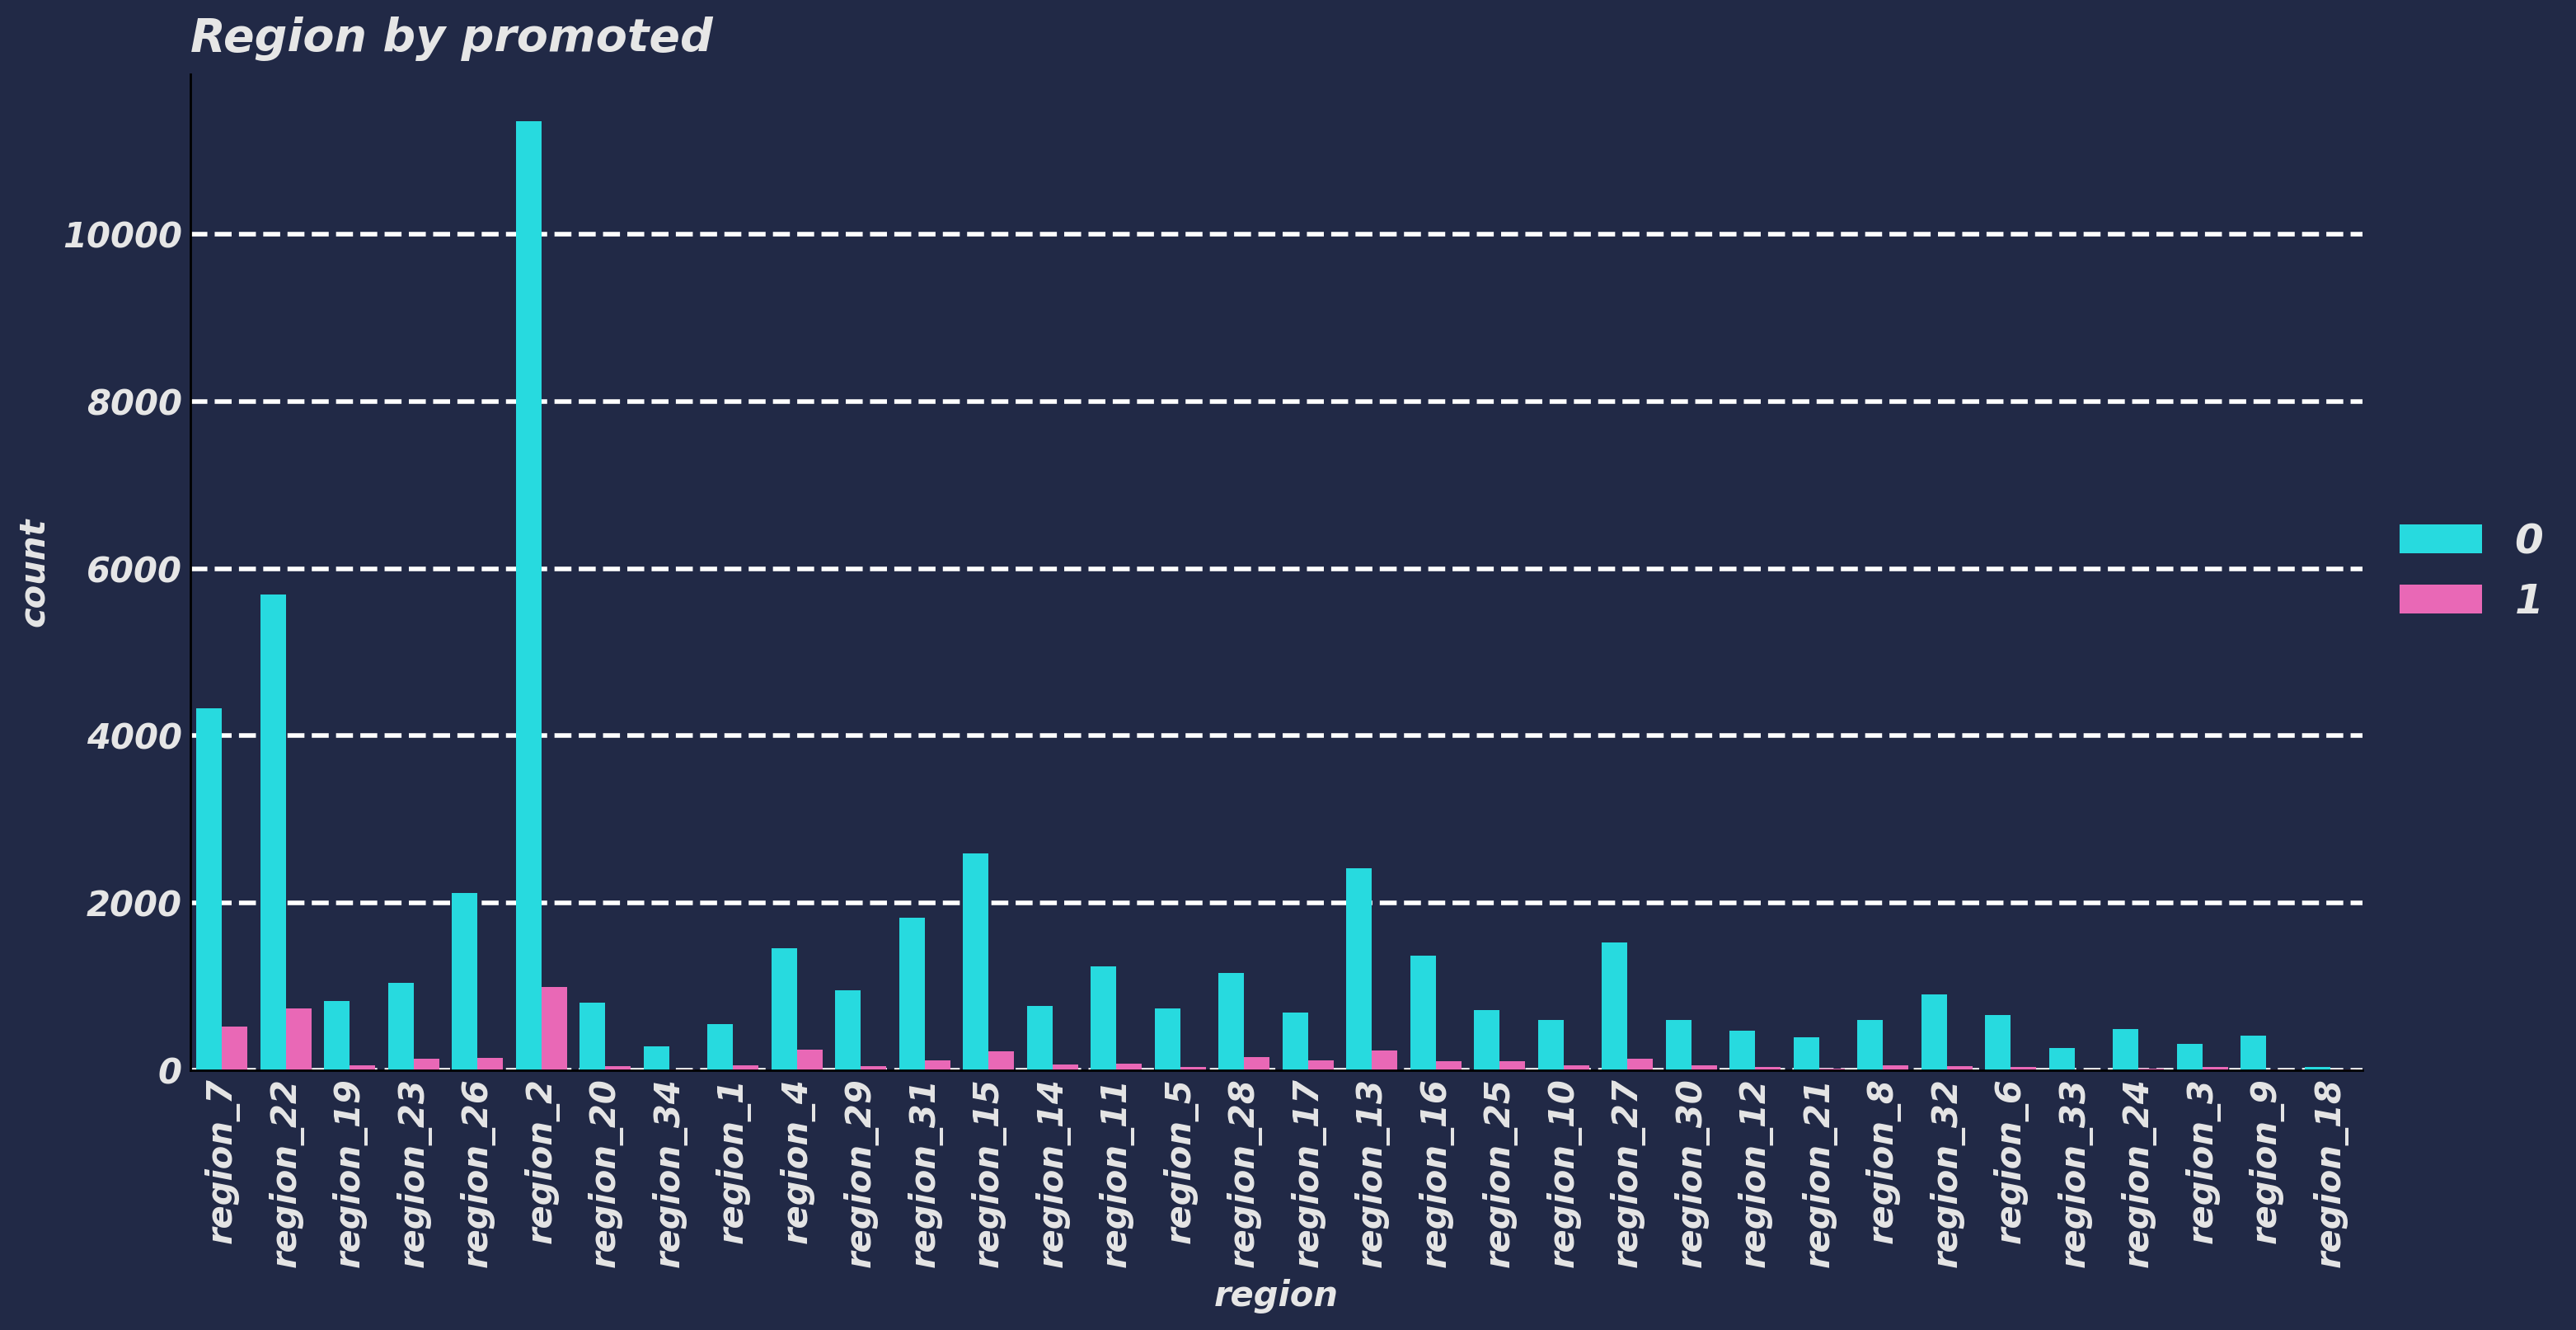

In [54]:
plt.figure(figsize=(17,8))
sns.countplot(train.region,hue=train.is_promoted) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.xticks(rotation=90) 
plt.title("Region by promoted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

In [57]:
#terlihat useless
train.groupby("region")["is_promoted"].mean().sort_values(ascending=False).to_frame() 

,is_promoted
region,
region_4,0.144451
region_17,0.136935
region_25,0.125763
region_28,0.116844
region_23,0.116596
region_22,0.114188
region_3,0.106936
region_7,0.106546
region_1,0.095082


In [15]:
for i in [train,test]:
    i["region"] = i.region.apply(lambda x: x.split("_")[1]).astype("int") 

In [117]:
test.region.value_counts().sort_index()

1      238
2     5299
3      147
4      775
5      342
6      298
7     1982
8      269
9      180
10     269
11     571
12     215
13    1167
14     350
15    1130
16     590
17     361
18      20
19     410
20     326
21     179
22    2739
23     516
24     219
25     337
26    1011
27     710
28     595
29     414
30     273
31     844
32     433
33     126
34     155
Name: region, dtype: int64

In [16]:
#perhalus feature mengunakan binning

bins = [0,10,20,34]
labels = ["region[1-10]", "region[10-20]", "region[20-34]"]
region = pd.cut(train.region,bins=bins,labels=labels)
region.value_counts()

region[1-10]     23024
region[20-34]    19670
region[10-20]    12114
Name: region, dtype: int64

In [110]:
train.groupby(region)["is_promoted"].mean().to_frame()

,is_promoted
new_region,
region[1-10],0.087952
region[10-20],0.077183
region[20-34],0.086833


In [114]:
region.describe()

count            54808
unique               3
top       region[1-10]
freq             23024
Name: new_region, dtype: object

In [17]:
for i in [train,test]:
    i["new_region"] = pd.cut(i.region, bins=bins, labels=labels)
    i.drop("region", axis=1, inplace=True) 

,education
Bachelor's,39078
Master's & above,14925
Below Secondary,805


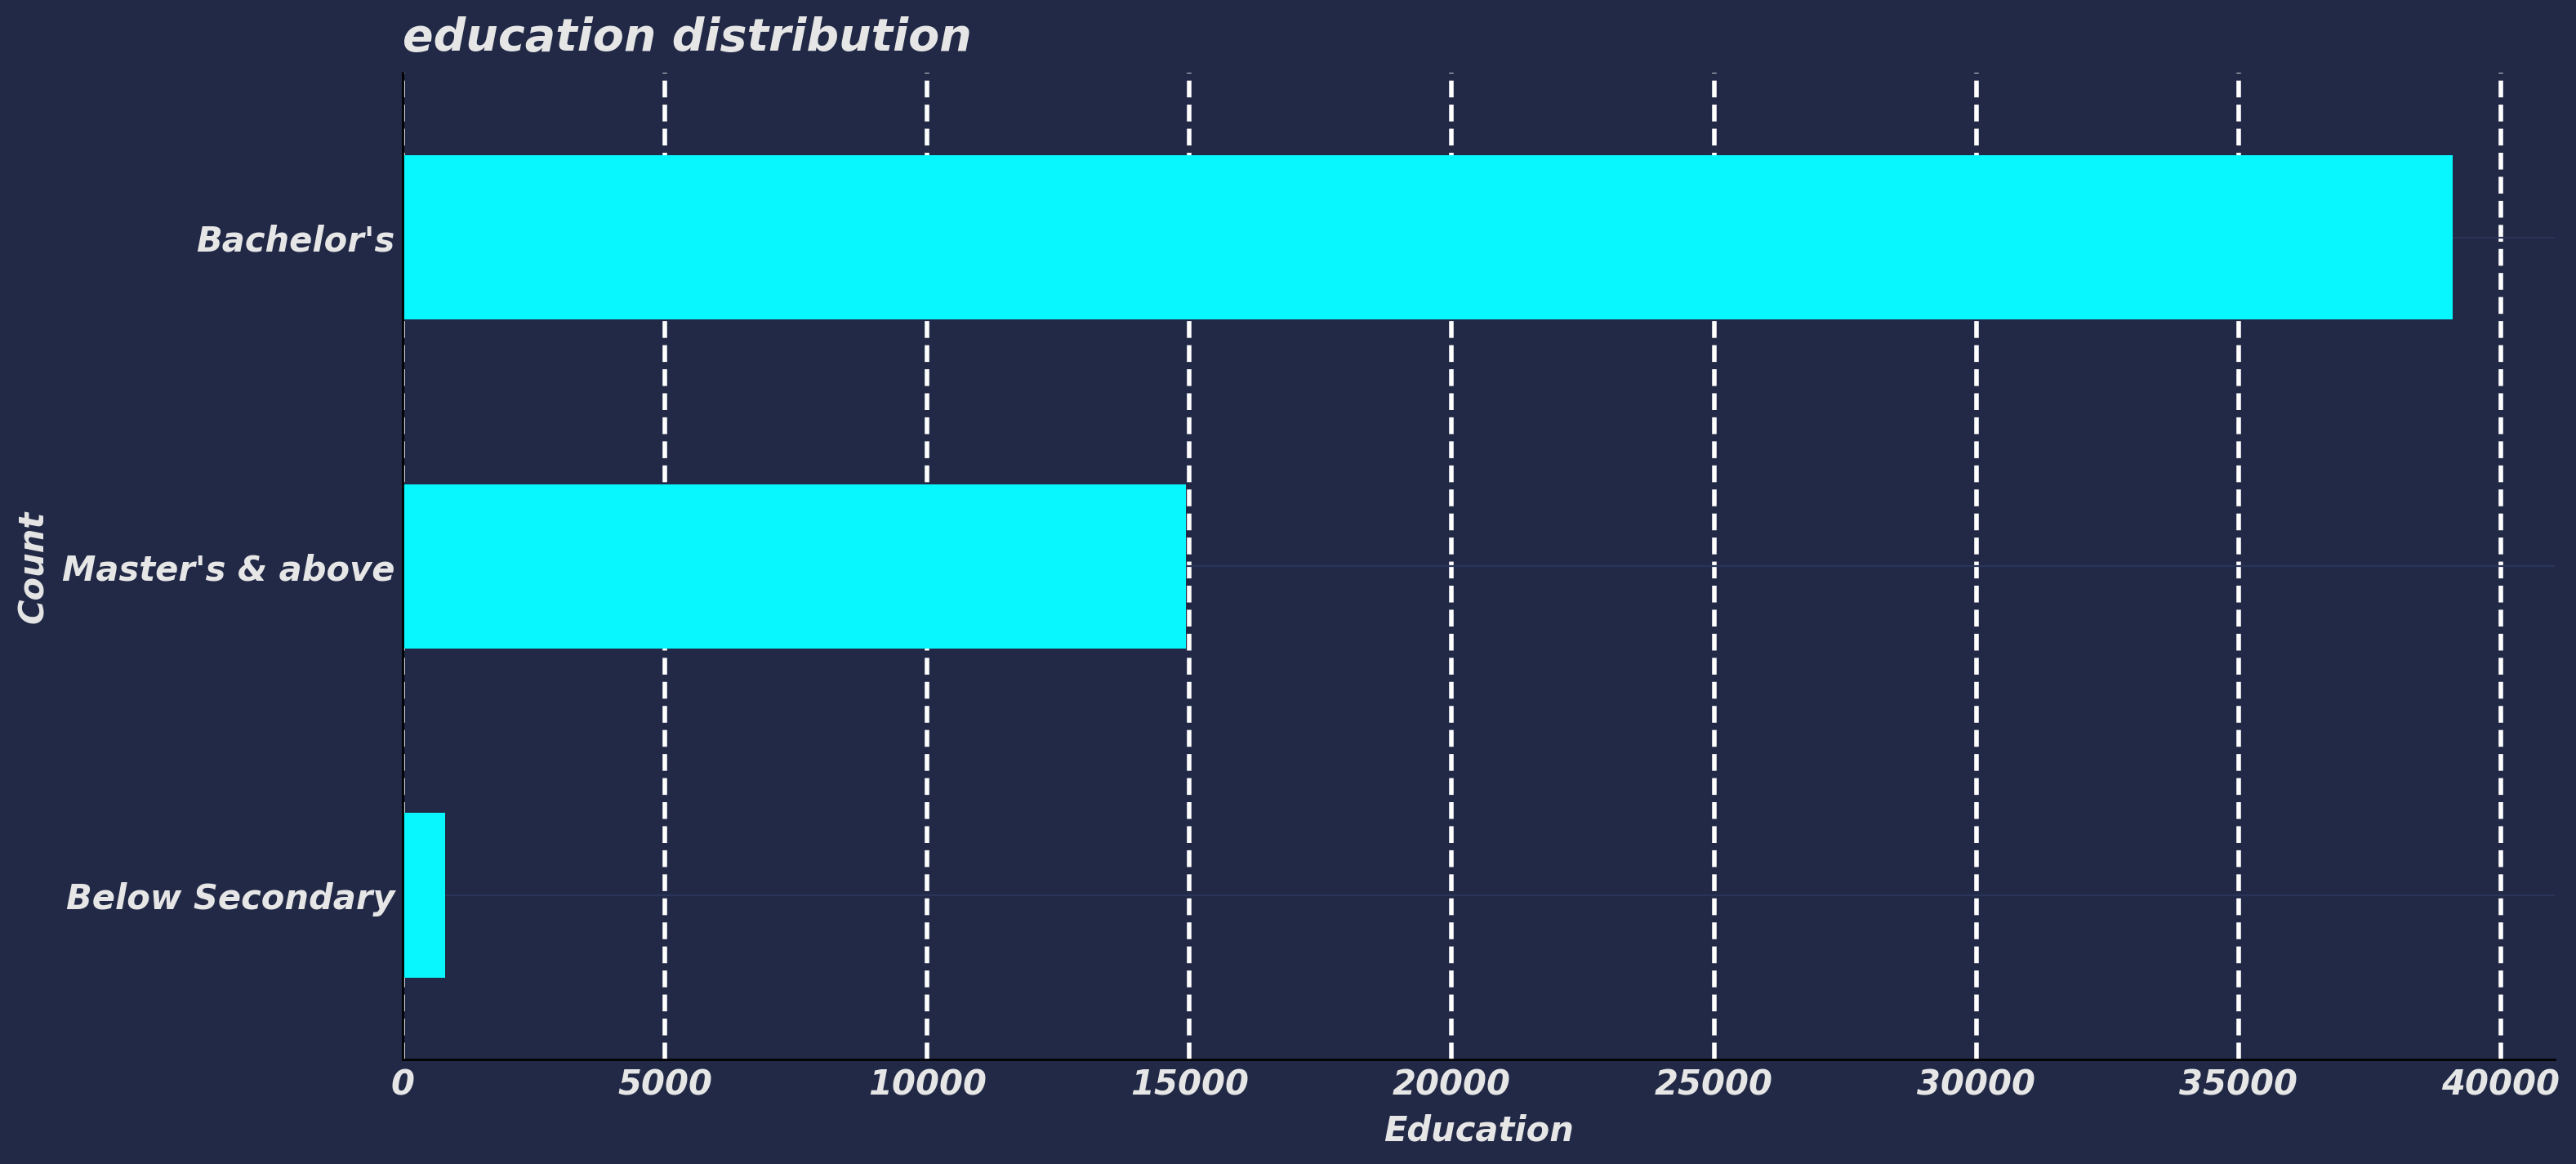

In [141]:
# Education
train.education.value_counts().sort_values(ascending=True).plot(kind="barh",figsize=(17,8))
plt.grid(axis="x", linewidth=2, linestyle="--", color="white") 

plt.xlabel("Education")
plt.ylabel("Count")
plt.title("education distribution")

train.education.value_counts().to_frame() 


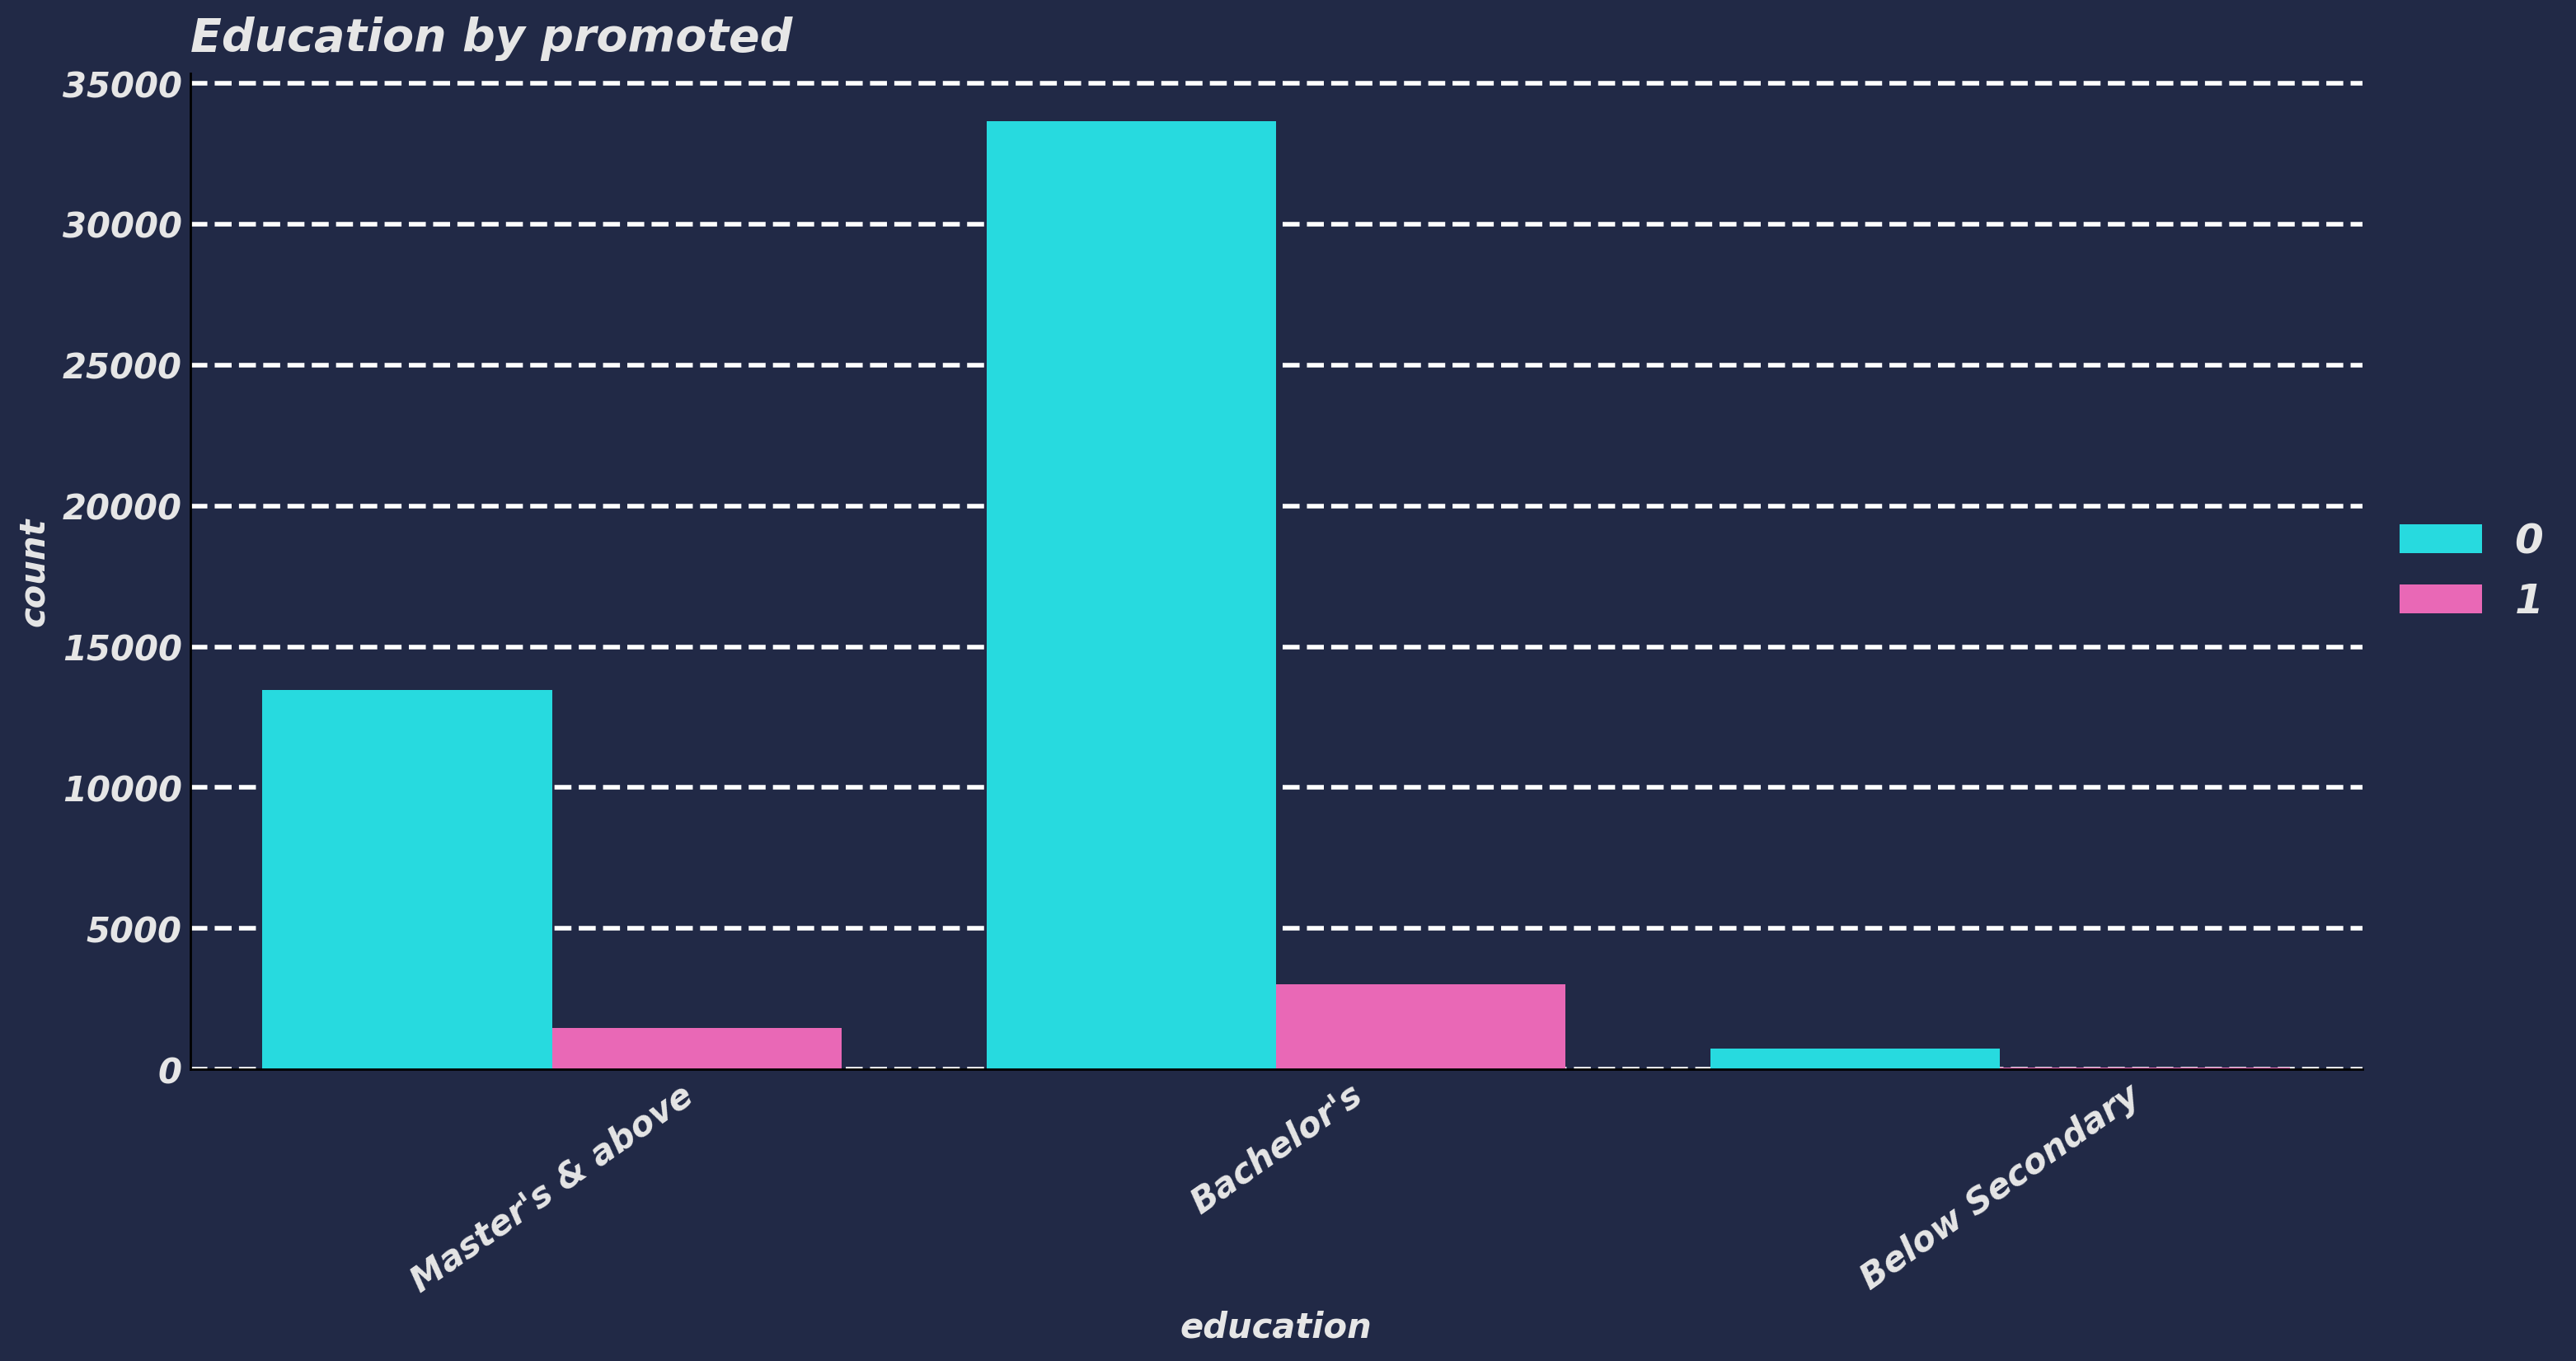

In [128]:
plt.figure(figsize=(17,8))
sns.countplot(train.education,hue=train.is_promoted) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.xticks(rotation=35) 
plt.title("Education by promoted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

In [129]:
train.groupby("education")["is_promoted"].mean().to_frame()

,is_promoted
education,
Bachelor's,0.082031
Below Secondary,0.083230
Master's & above,0.098559


In [133]:
train.groupby("department")["education"].value_counts().to_frame()

education
department        education                  
Analytics         Bachelor's             3978
                  Master's & above       1037
Finance           Bachelor's             1895
                  Master's & above        499
                  Below Secondary         106
HR                Bachelor's             1525
                  Master's & above        733
                  Below Secondary         128
Legal             Bachelor's              814
                  Master's & above        156
                  Below Secondary          65
Operations        Bachelor's             7781
                  Master's & above       3165
                  Below Secondary         176
Procurement       Bachelor's             4393
                  Master's & above       2544
                  Below Secondary         129
R&D               Bachelor's              542
                  Master's & above        429
Sales & Marketing Bachelor's            11099
                  Master's & above       4166
Technology        Bachelor's             4642
                  Master's & above       2196
                  Below Secondary         201

In [18]:
# fill nan education
for i in [train,test]:
    i["education"] = i.groupby("department")["education"].apply(lambda x: x.fillna(x.mode()[0])) 

,gender
m,38496
f,16312


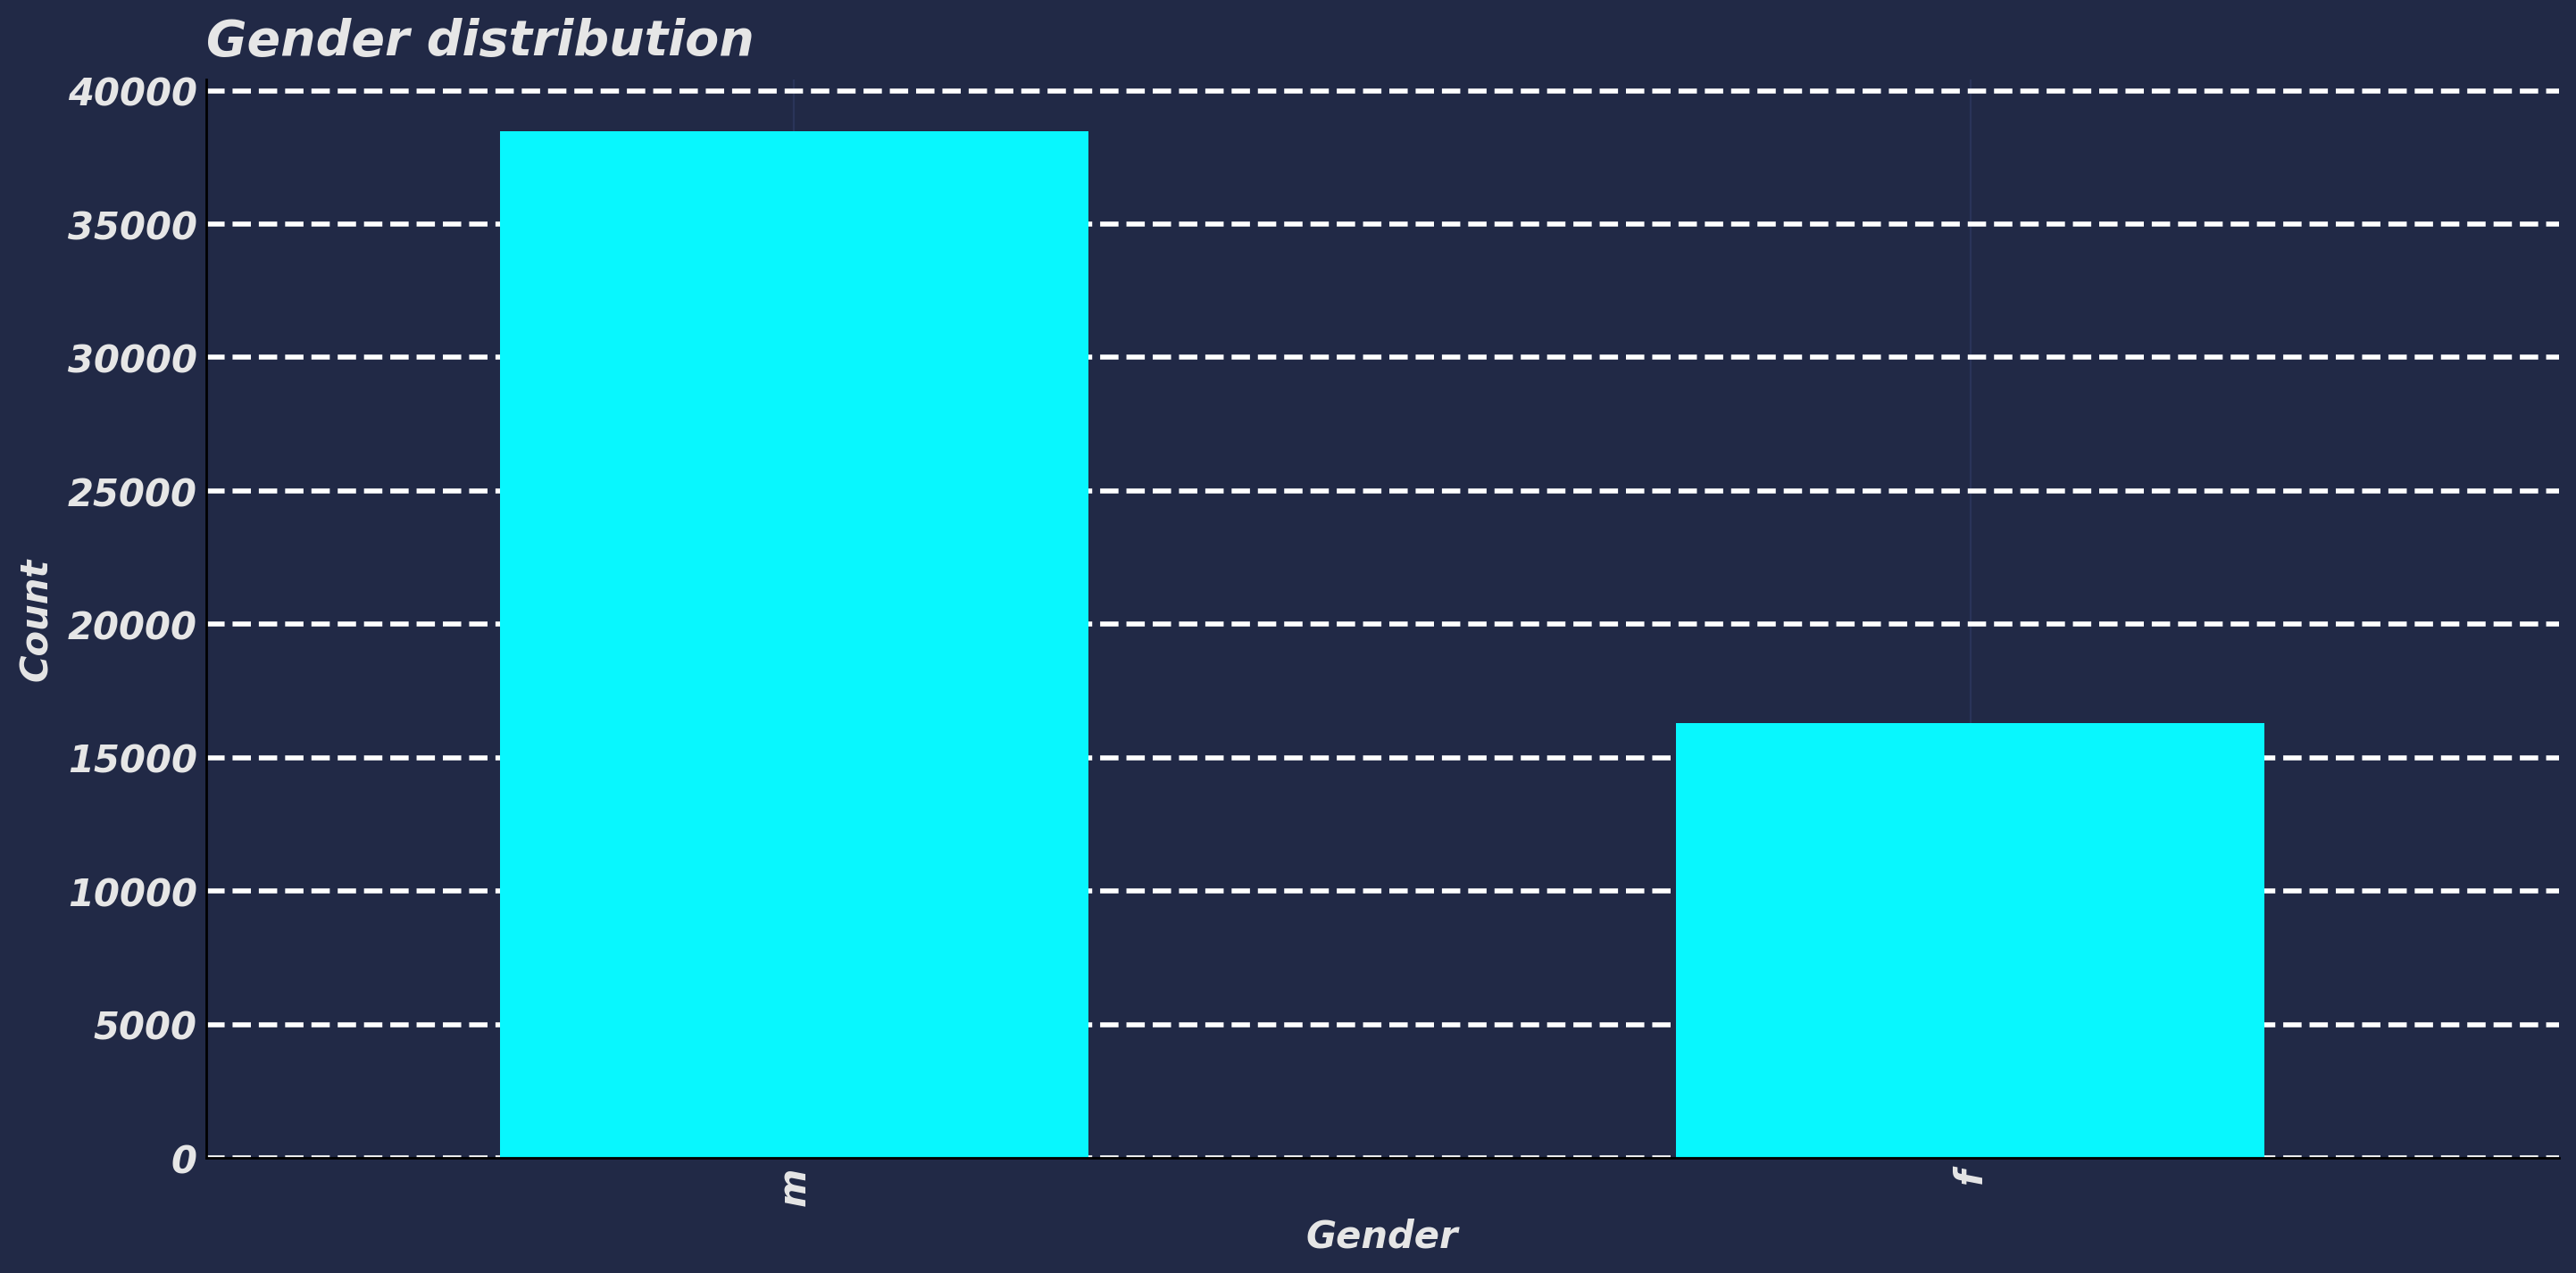

In [137]:
#Gender

train.gender.value_counts().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender distribution")

train.gender.value_counts().to_frame() 


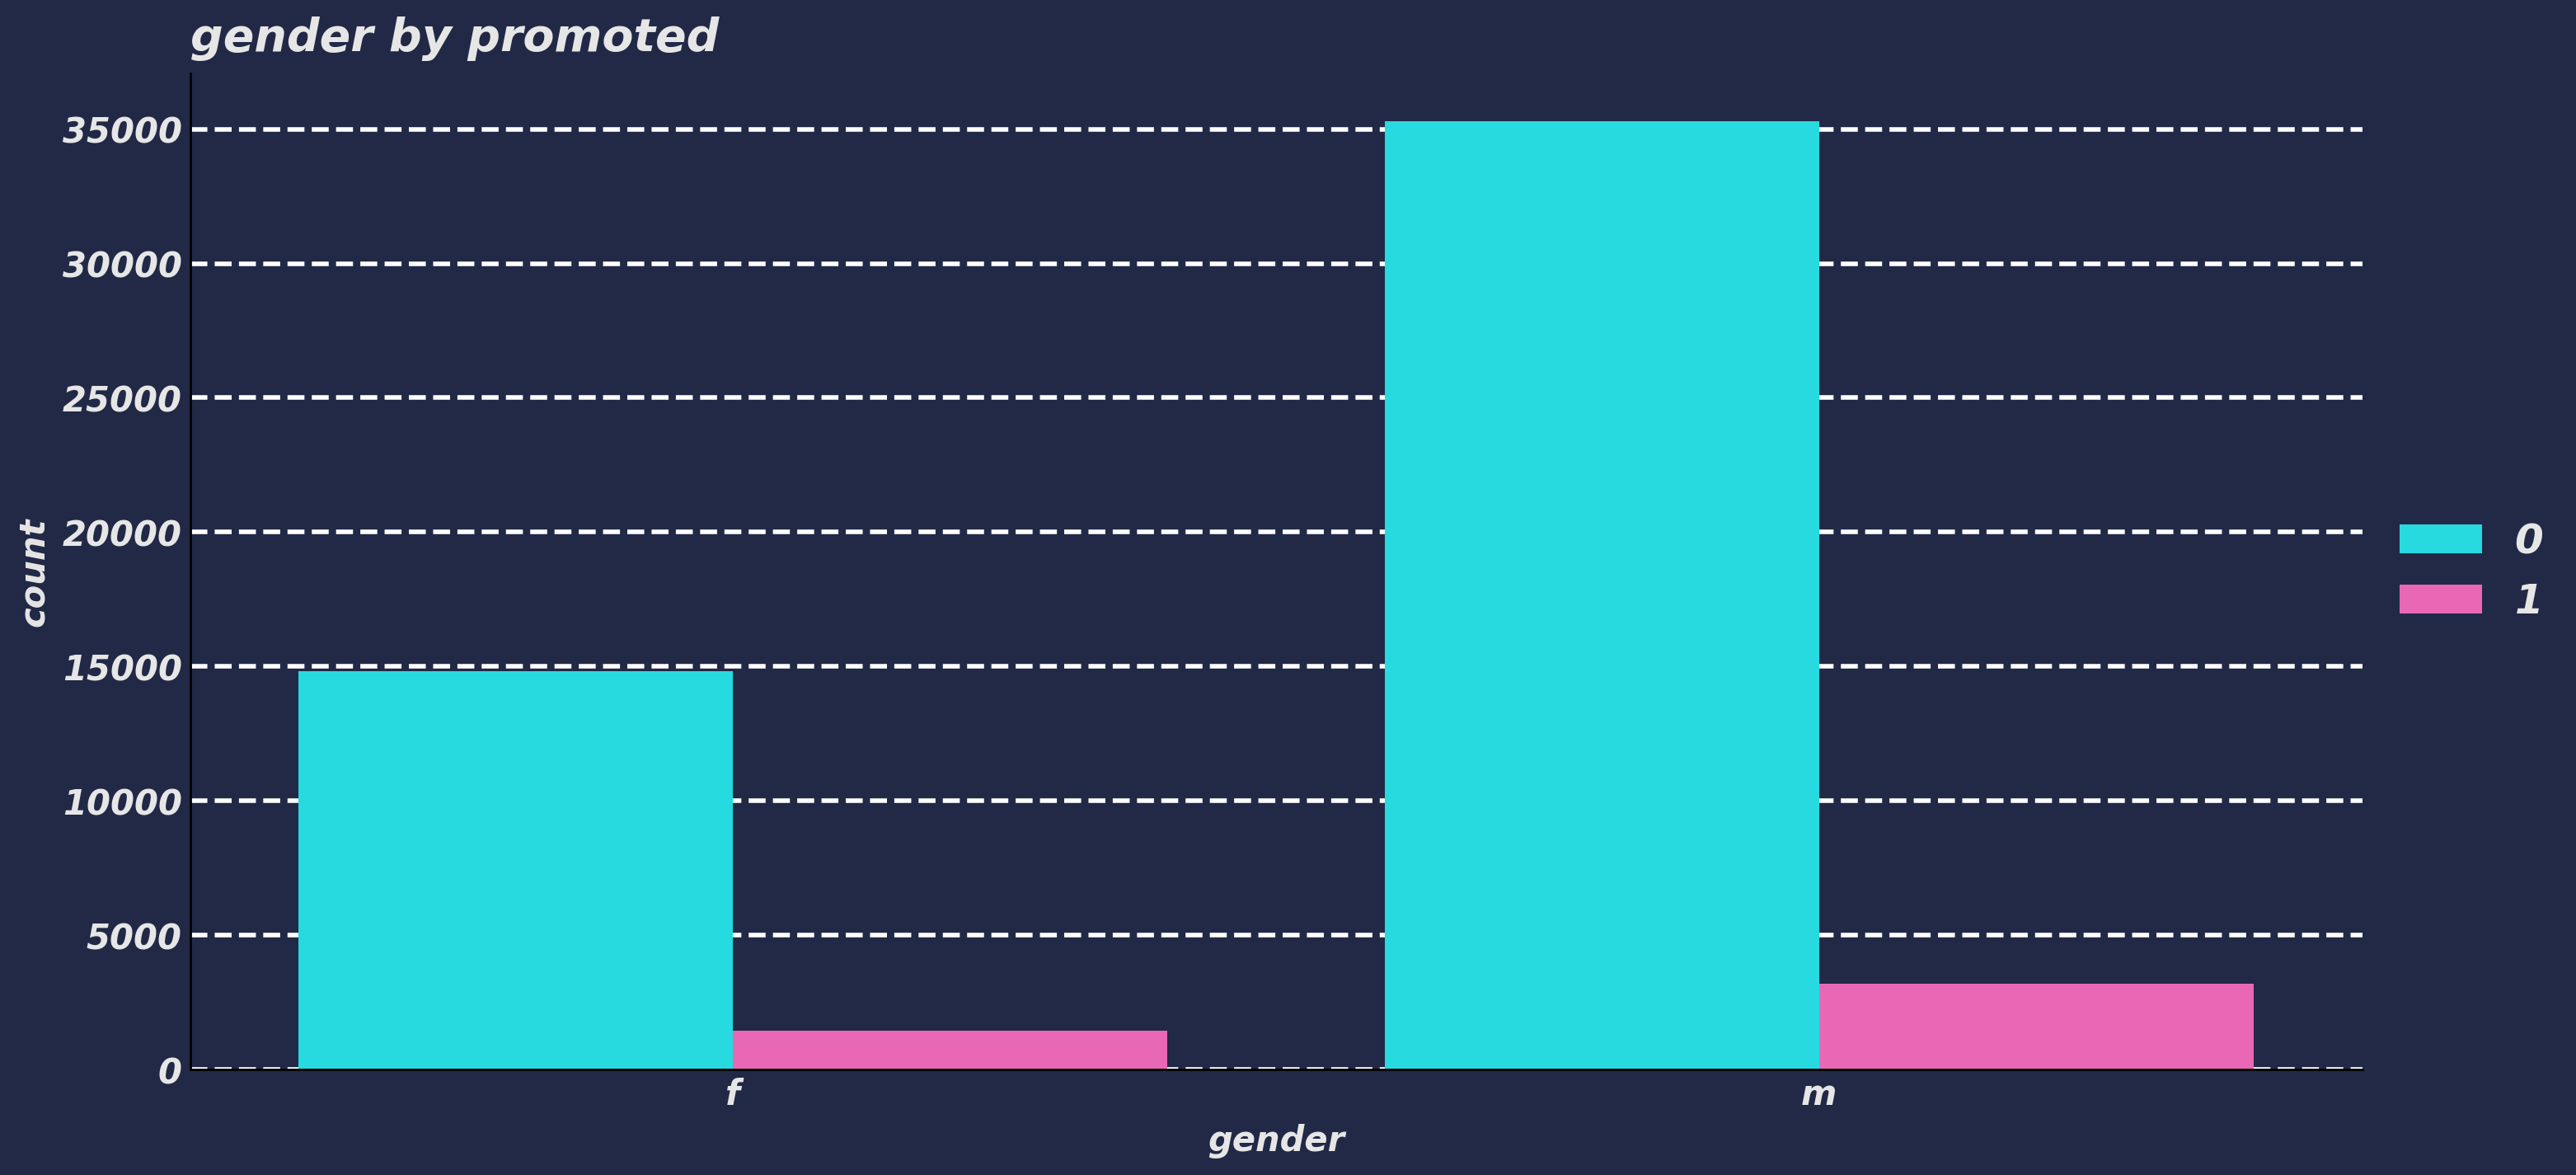

In [138]:
plt.figure(figsize=(17,8))

sns.countplot(train.gender,hue=train.is_promoted) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")

plt.title("gender by promoted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

In [139]:
train.groupby("gender")["is_promoted"].mean().to_frame()

,is_promoted
gender,
f,0.089934
m,0.083151


In [ ]:
# recruitment_channel

,recruitment_channel
other,30446
sourcing,23220
referred,1142


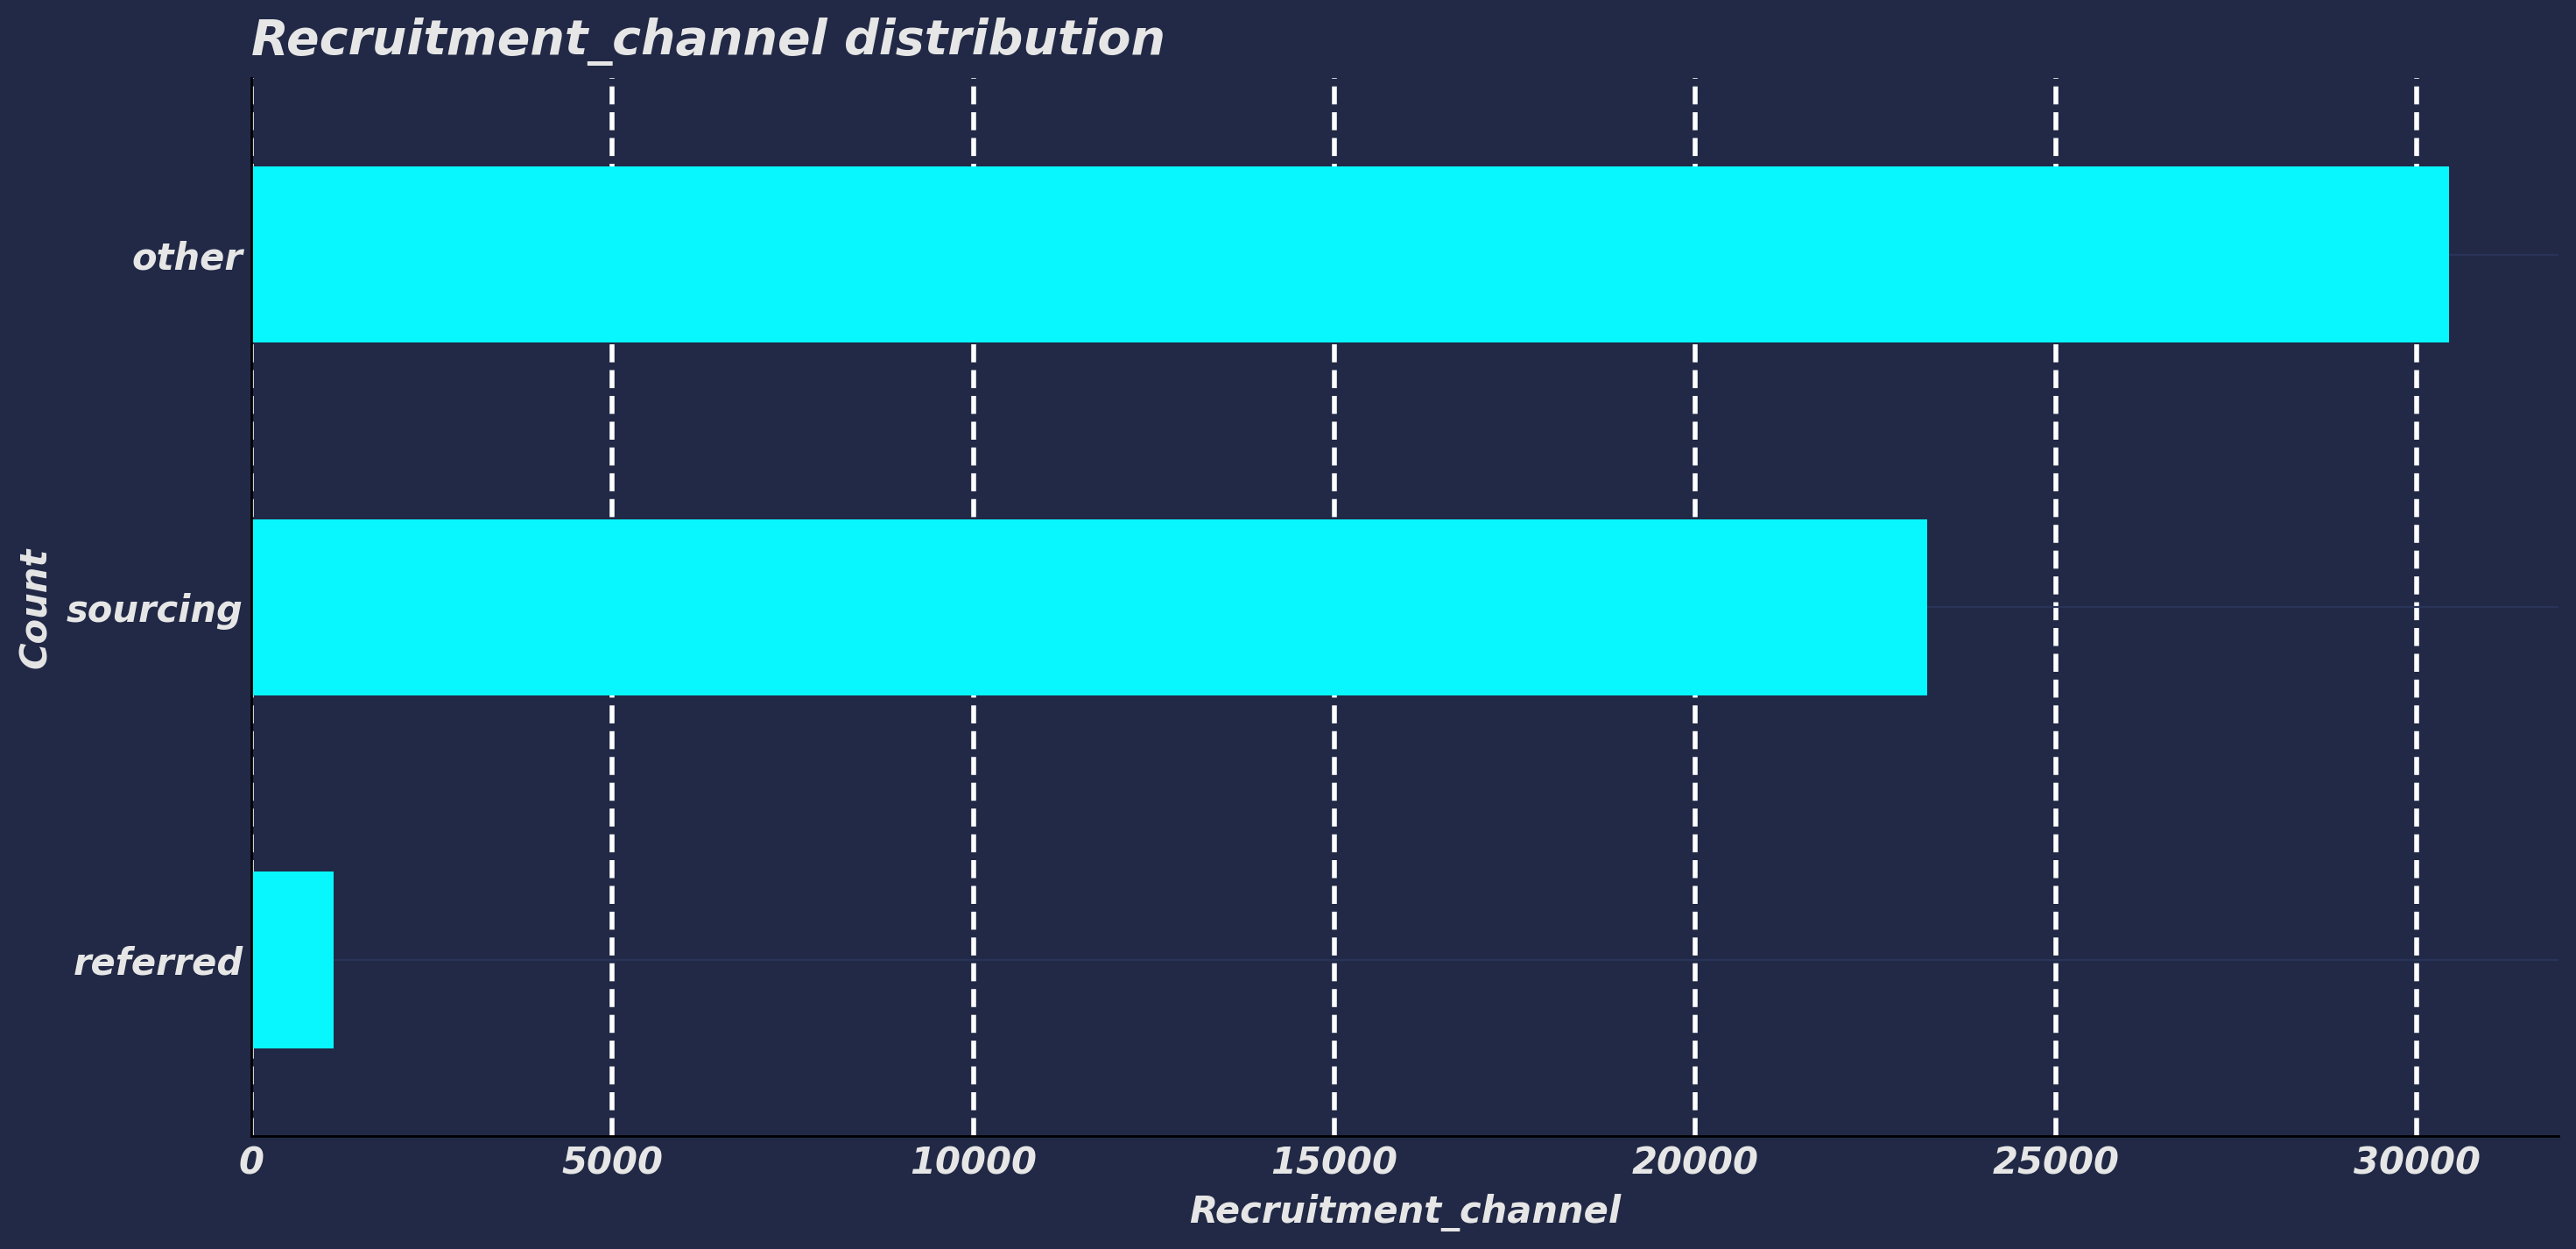

In [145]:

train.recruitment_channel.value_counts().sort_values(ascending=True).plot(kind="barh",figsize=(17,8))
plt.grid(axis="x", linewidth=2, linestyle="--", color="white") 

plt.xlabel("Recruitment_channel")
plt.ylabel("Count")
plt.title("Recruitment_channel distribution")

train.recruitment_channel.value_counts().to_frame() 


In [16]:
train.groupby("recruitment_channel")["is_promoted"].mean().to_frame() 

,is_promoted
recruitment_channel,
other,0.083952
referred,0.120841
sourcing,0.085013


In [ ]:
# numerical features

In [20]:
train[number].describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [30]:
train[number].head() 

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,1,35,5.0,8,1,0,49
1,65141,1,30,5.0,4,0,0,60
2,7513,1,34,3.0,7,0,0,50
3,2542,2,39,1.0,10,0,0,50
4,48945,1,45,3.0,2,0,0,73


In [19]:
conti = train[["age","avg_training_score","length_of_service"]].columns
dis =  train[["no_of_trainings","previous_year_rating","KPIs_met >80%","awards_won?"]].columns

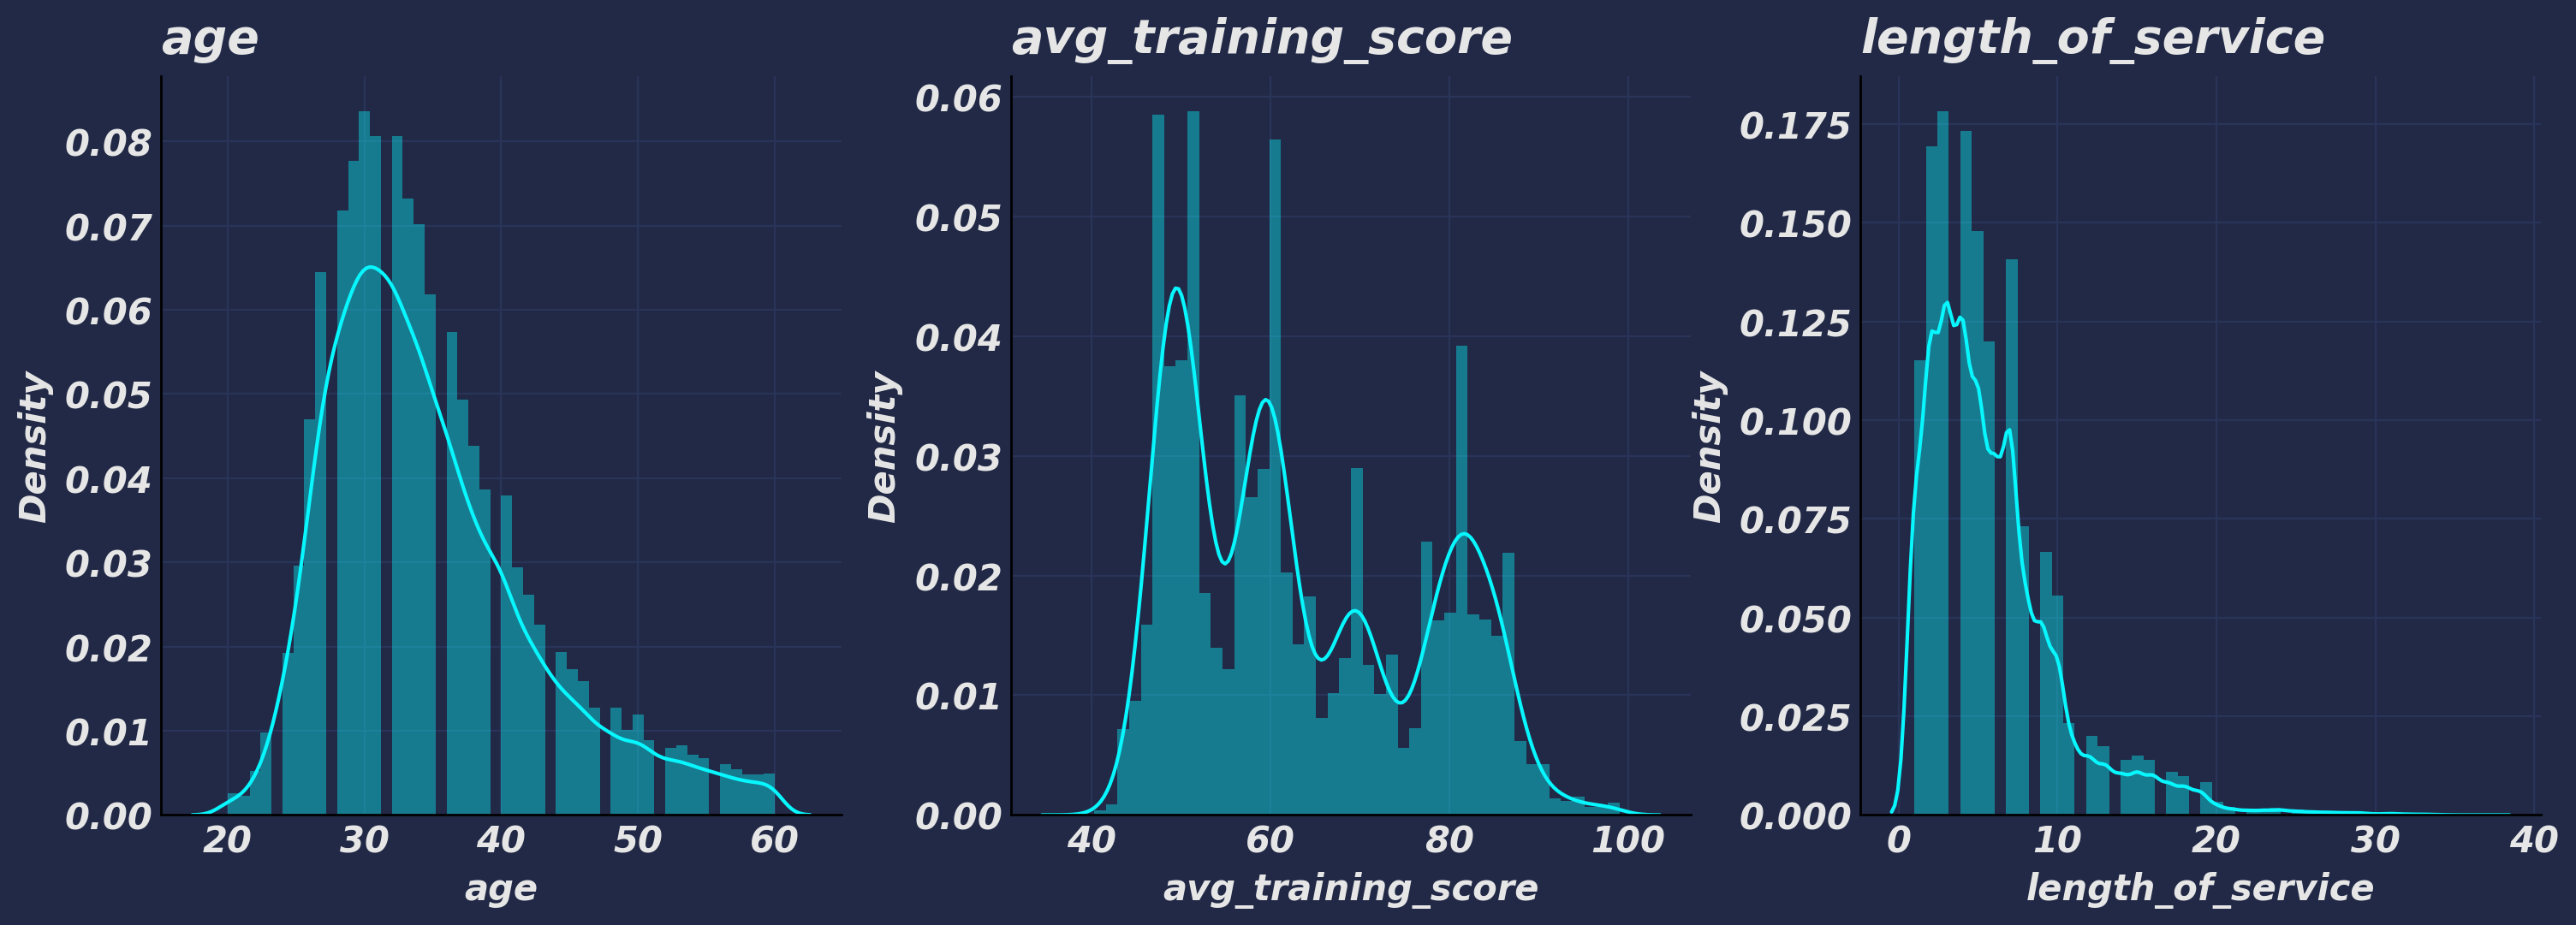

In [72]:
plt.figure(figsize=(20,20))

for i,j in enumerate(conti):
    plt.subplot(4,4,i+1) 
    
    sns.distplot(train[j]) 
    plt.title(j)
    
plt.tight_layout() 
plt.show() 

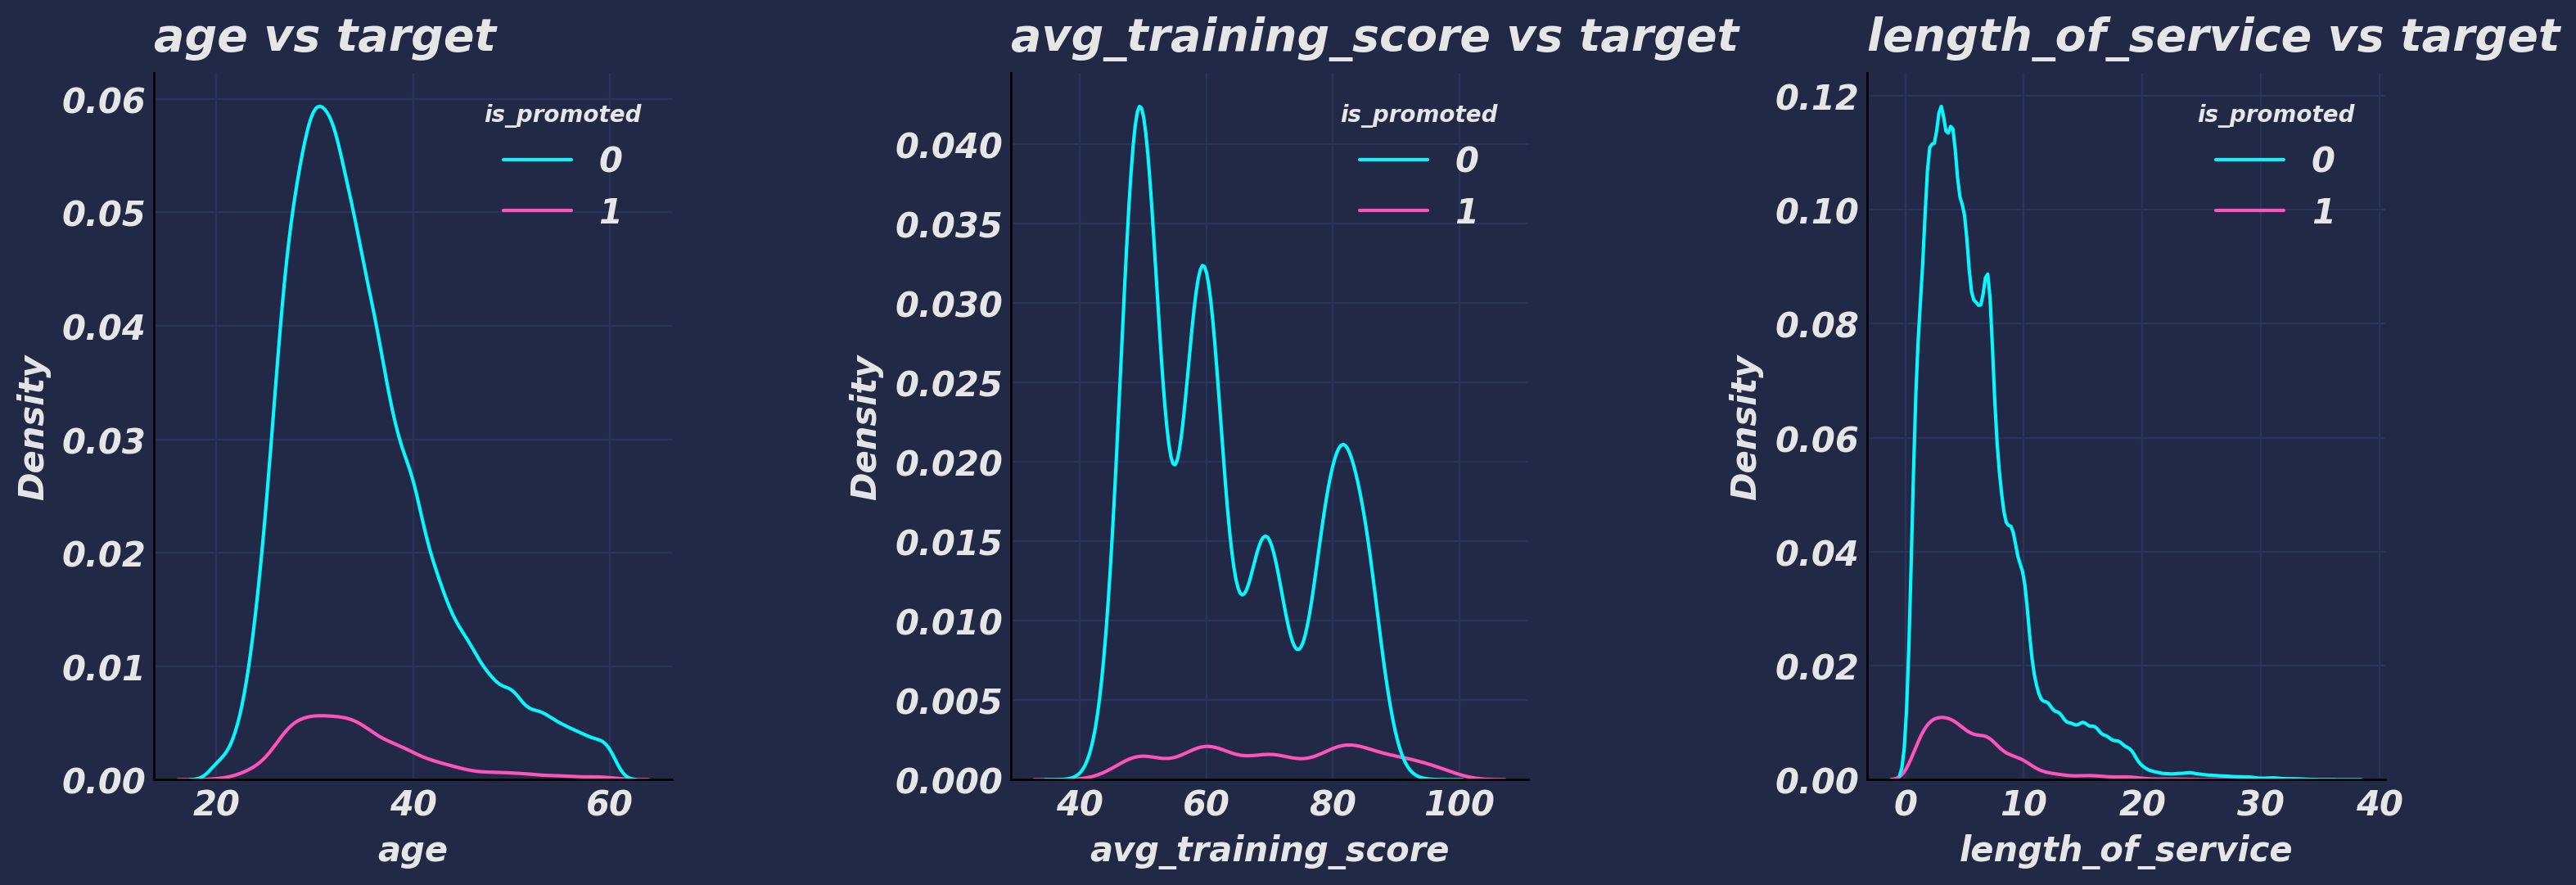

In [78]:
plt.figure(figsize=(20,20))

for i,j in enumerate(conti):
    plt.subplot(4,4,i+1) 
    
    sns.kdeplot(train[j],hue=train.is_promoted) 
    plt.title(j + " vs target")
    
plt.tight_layout() 
plt.show() 

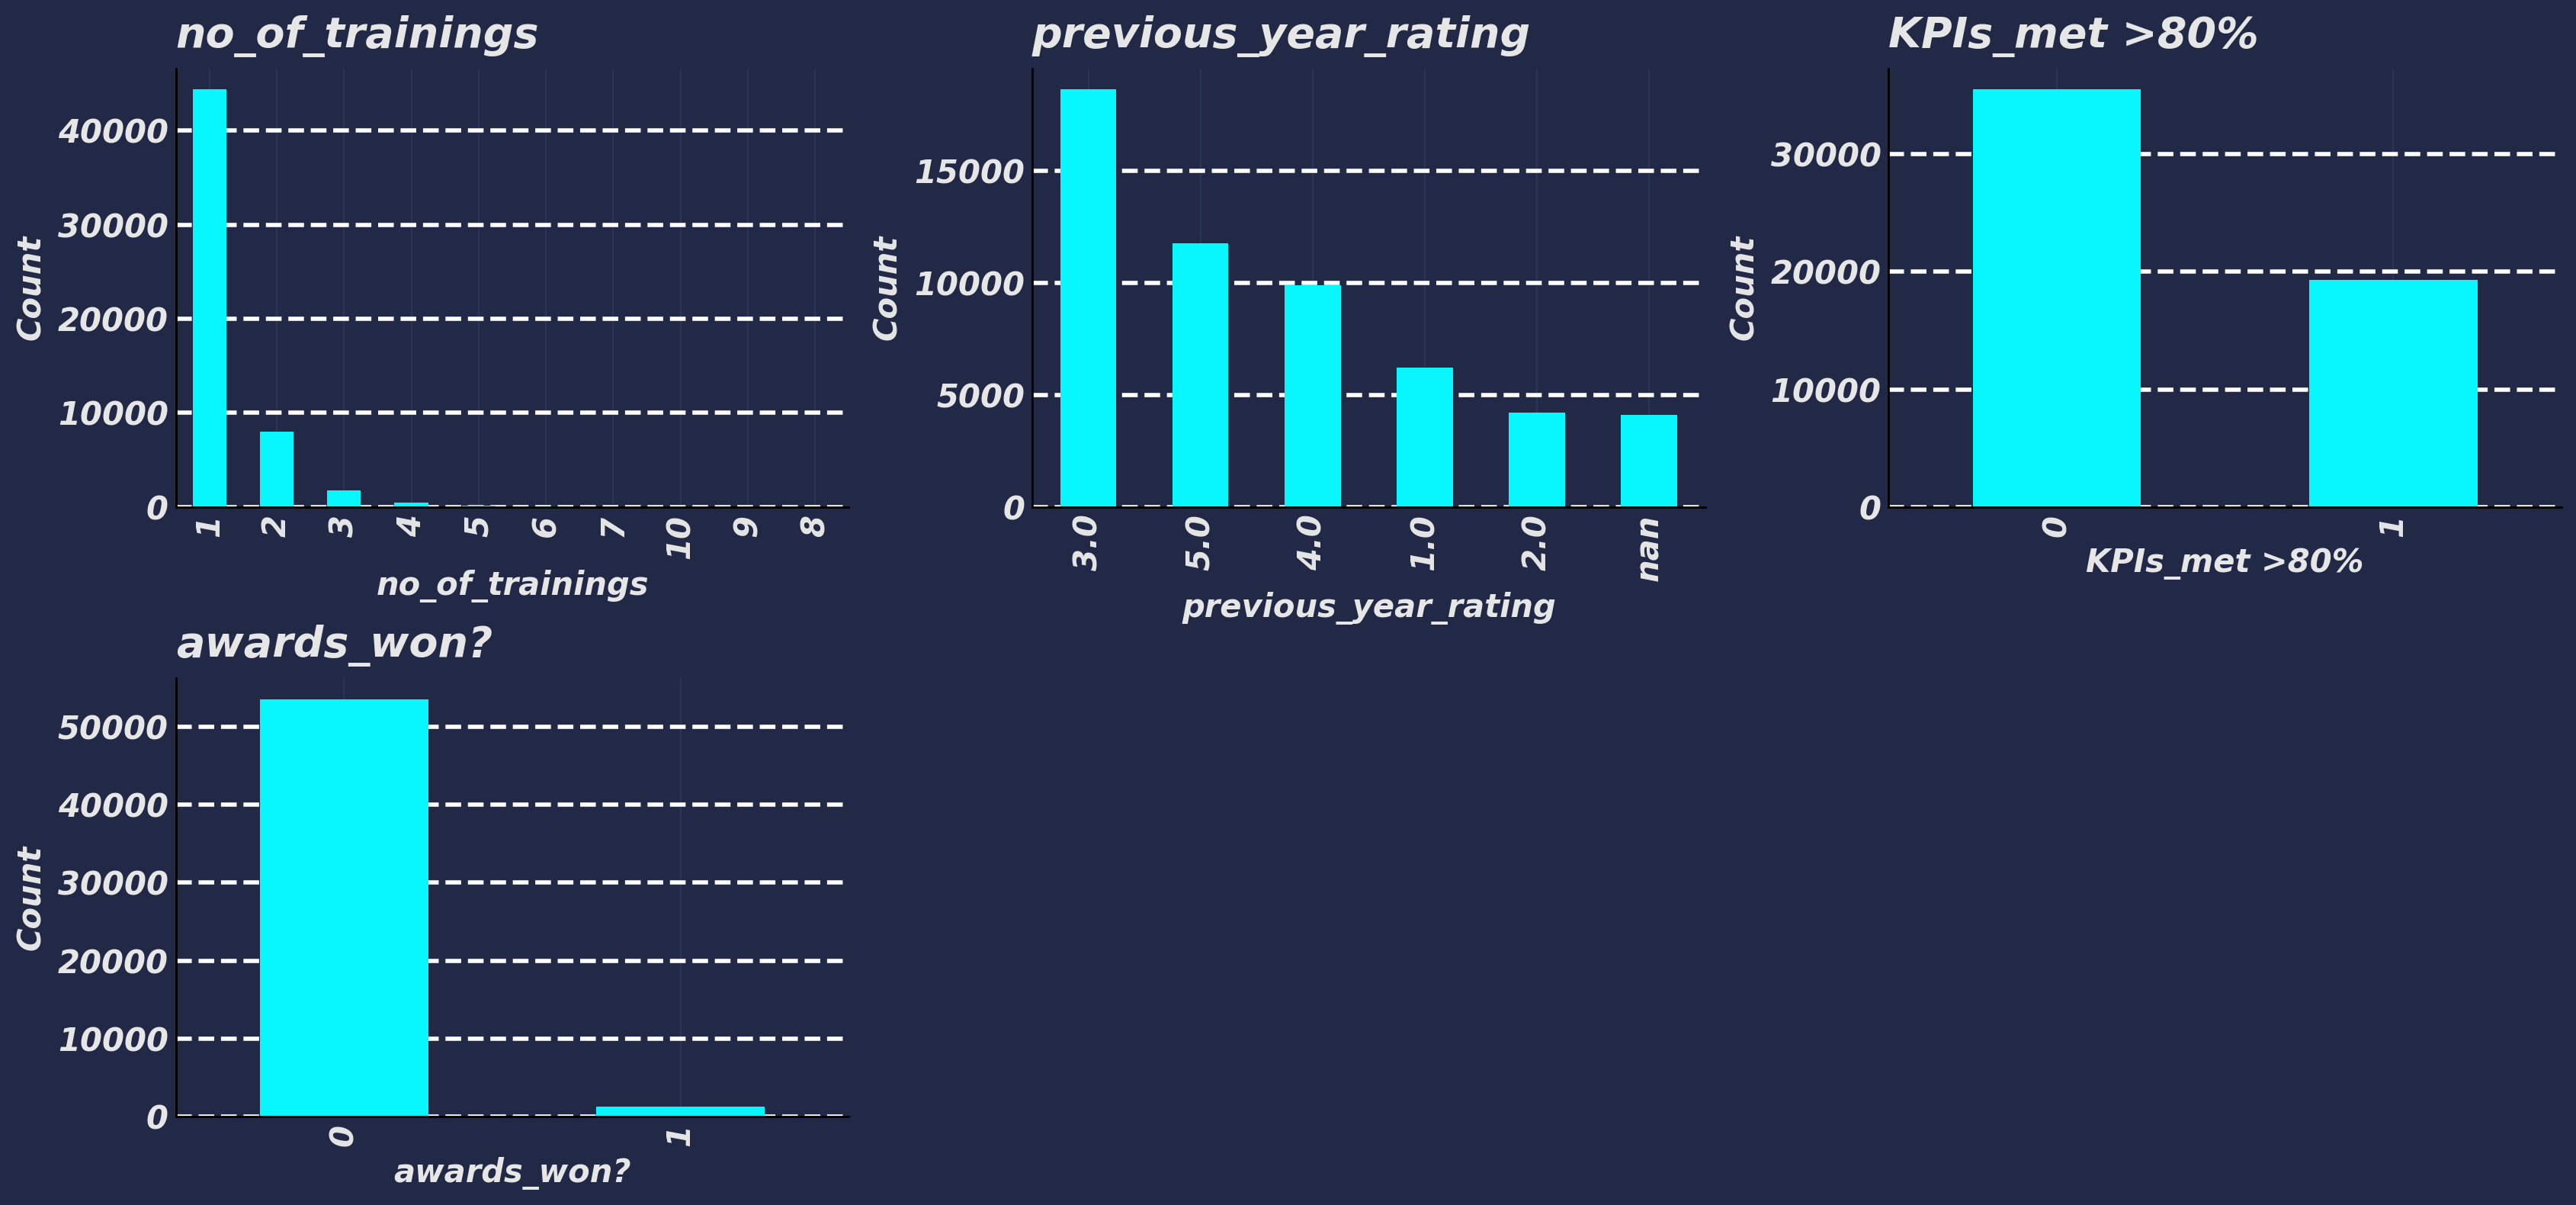

In [66]:
for i,j in enumerate(dis):
    plt.subplot(2,3,i+1) 
    
    train[j].value_counts(dropna=False).plot(kind="bar", figsize=(17, 8))
    plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 
    plt.xlabel(j) 
    plt.ylabel("Count")
    plt.title(j) 

plt.tight_layout() 
plt.show() 

In [99]:
train.groupby("is_promoted")[conti].agg(["count","mean", "max"]) 

age                avg_training_score                 \
             count       mean max              count       mean max   
is_promoted                                                           
0            50140  34.844037  60              50140  62.647686  96   
1             4668  34.372965  60               4668  71.325193  99   

            length_of_service                
                        count      mean max  
is_promoted                                  
0                       50140  5.879398  37  
1                        4668  5.716367  34

In [98]:
train.groupby("is_promoted")[dis].agg(["count","mean","max"]) 

no_of_trainings               previous_year_rating                 \
                      count      mean max                count      mean  max   
is_promoted                                                                     
0                     50140  1.257639  10                46355  3.267911  5.0   
1                      4668  1.203299   6                 4329  3.986140  5.0   

            KPIs_met >80%               awards_won?                
                    count      mean max       count      mean max  
is_promoted                                                        
0                   50140  0.319685   1       50140  0.014180   1  
1                    4668  0.698800   1        4668  0.119751   1

Text(0.0, 1.0, 'Correlation')

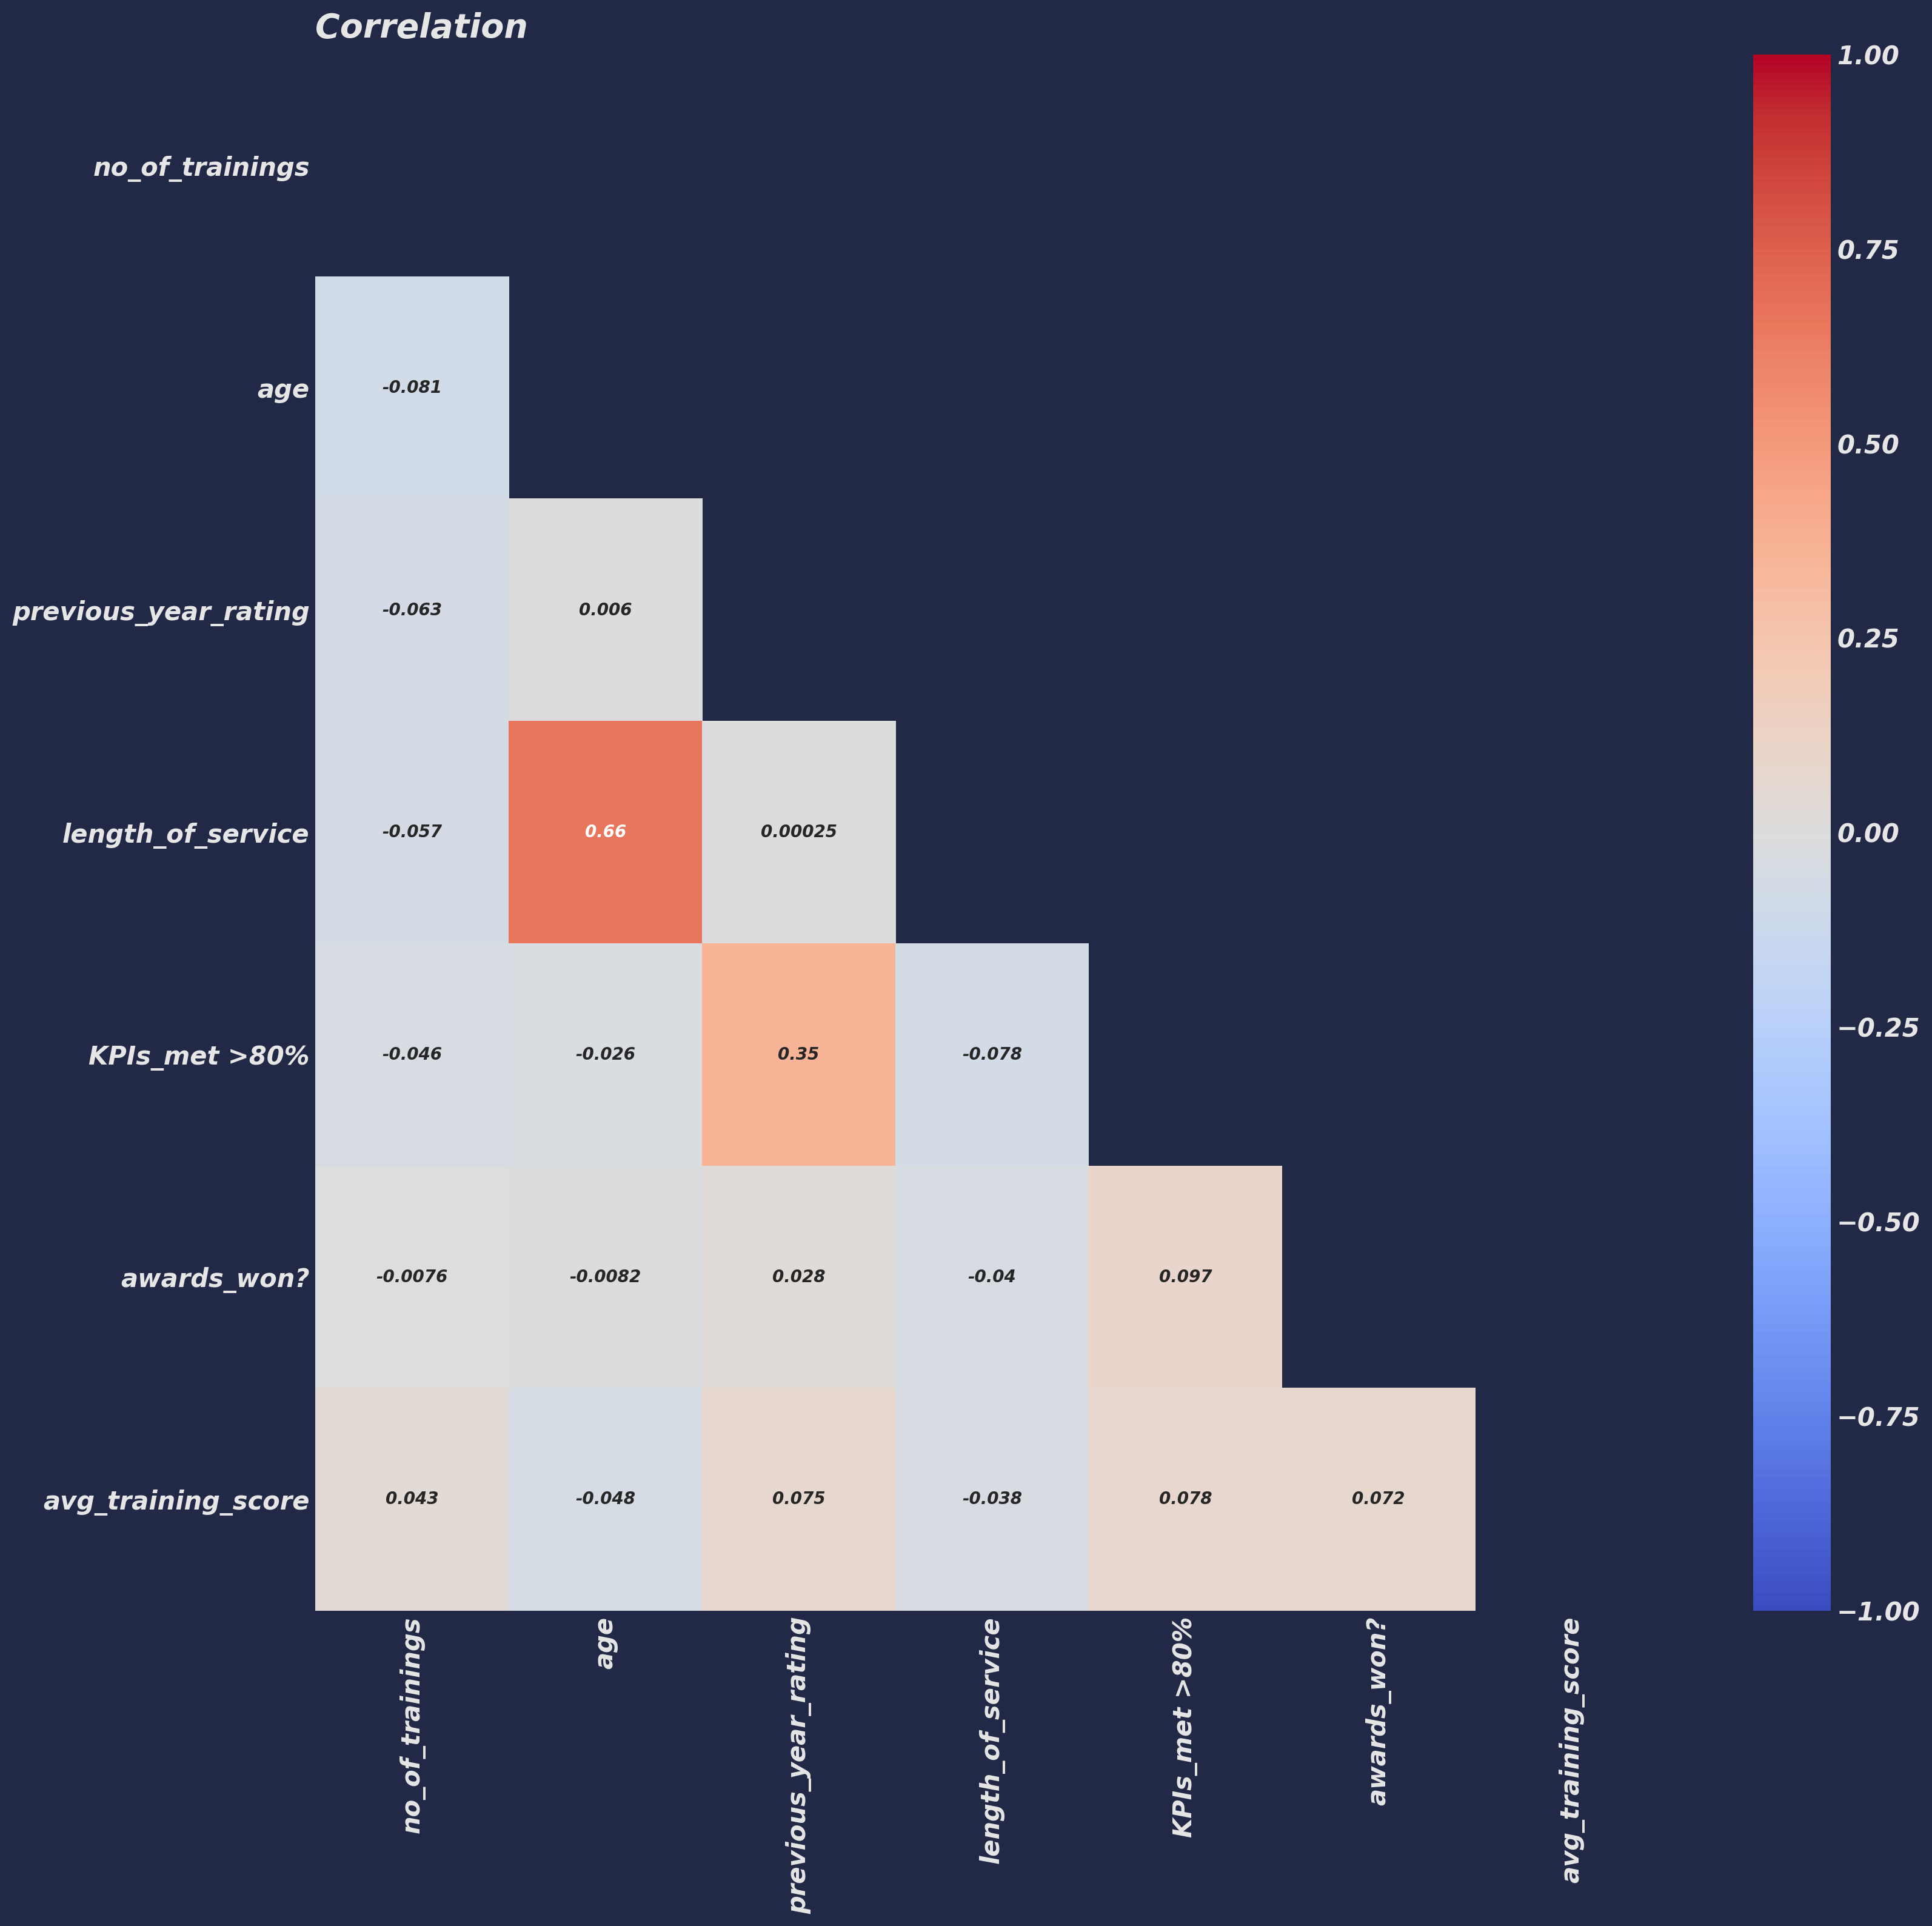

In [112]:
# check correlation
plt.figure(figsize=(18,17)) 
cor = np.triu(train[number[1:]].corr()) 

sns.heatmap(train[number[1:]].corr(),annot=True,mask=cor,cmap="coolwarm",vmin=-1,vmax=1)
plt.title("Correlation")

In [20]:
for i in [train,test]:
    i["previous_year_rating"] = i.groupby("KPIs_met >80%")["previous_year_rating"].apply(lambda x: x.fillna(x.median())).astype("int32") 

# Multivariat analysis & Feature engineering

In [170]:
train.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,new_region
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5,8,1,0,49,0,region[1-10]
1,65141,Operations,Bachelor's,m,other,1,30,5,4,0,0,60,0,region[20-34]
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0,region[10-20]
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1,10,0,0,50,0,region[20-34]
4,48945,Technology,Bachelor's,m,other,1,45,3,2,0,0,73,0,region[20-34]


In [210]:
train.groupby(["department","education"])["avg_training_score"].mean().to_frame().style.bar(subset=["avg_training_score"],color="Reds").background_gradient()

In [196]:
female = train.query("gender == 'f'")
male = train.query("gender == 'm'") 

In [208]:
#famale
female.groupby(["department","education"])["avg_training_score"].mean().to_frame().style.bar(subset=["avg_training_score"],color="Reds").background_gradient() 

In [213]:
#male
male.groupby(["department","education"])["avg_training_score"].mean().to_frame().style.bar(subset=["avg_training_score"],color="Reds").background_gradient() 

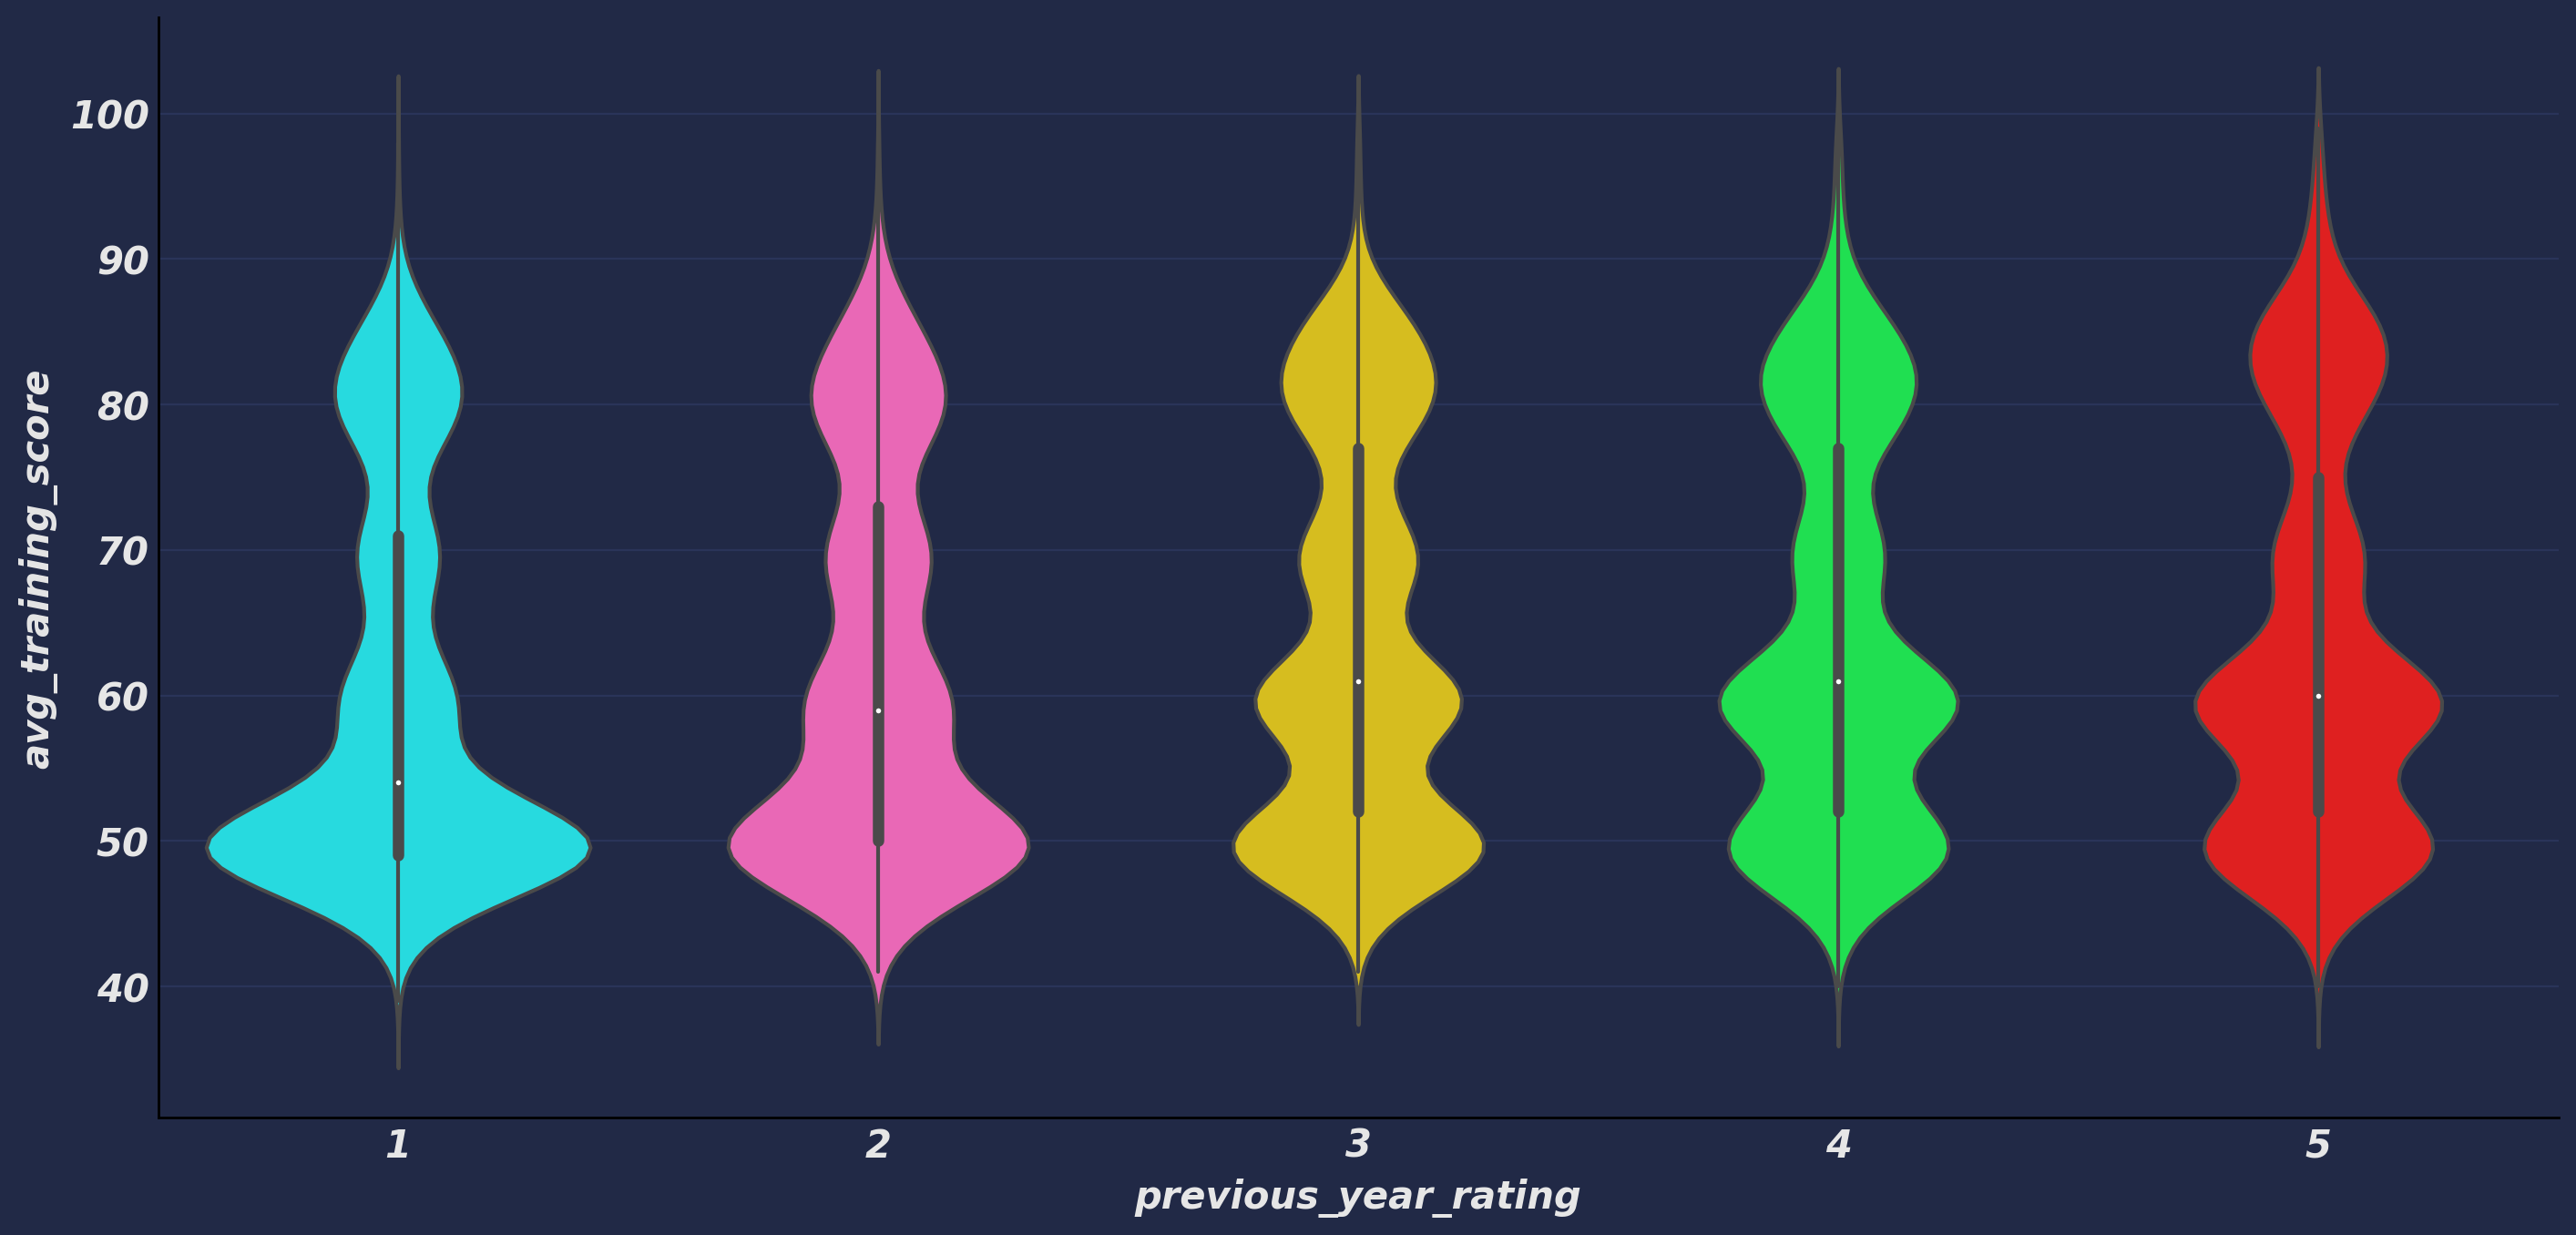

In [216]:
plt.figure(figsize=(17,8))

sns.violinplot(x=train.previous_year_rating, y=train.avg_training_score) 

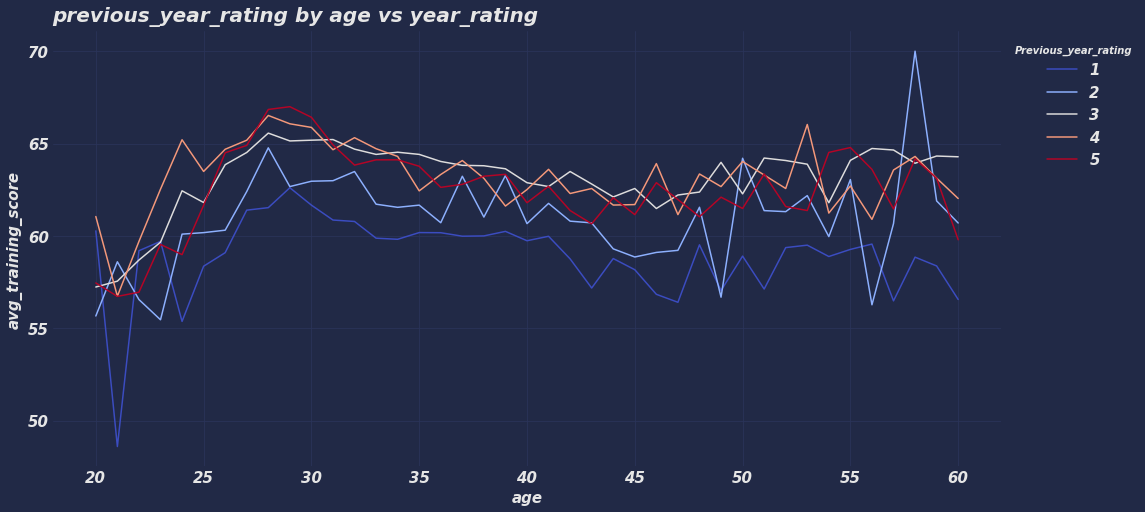

In [46]:
plt.figure(figsize=(17,8))

sns.lineplot(hue=train.previous_year_rating,x = train.age,y=train.avg_training_score,sizes = 50,ci=None,palette="coolwarm")

plt.title("previous_year_rating by age vs year_rating") 
plt.legend(title="Previous_year_rating",loc="center_left", bbox_to_anchor=(1, 1)) 

Text(0.0, 1.0, 'KPI_met >80% by age vs awards_won')

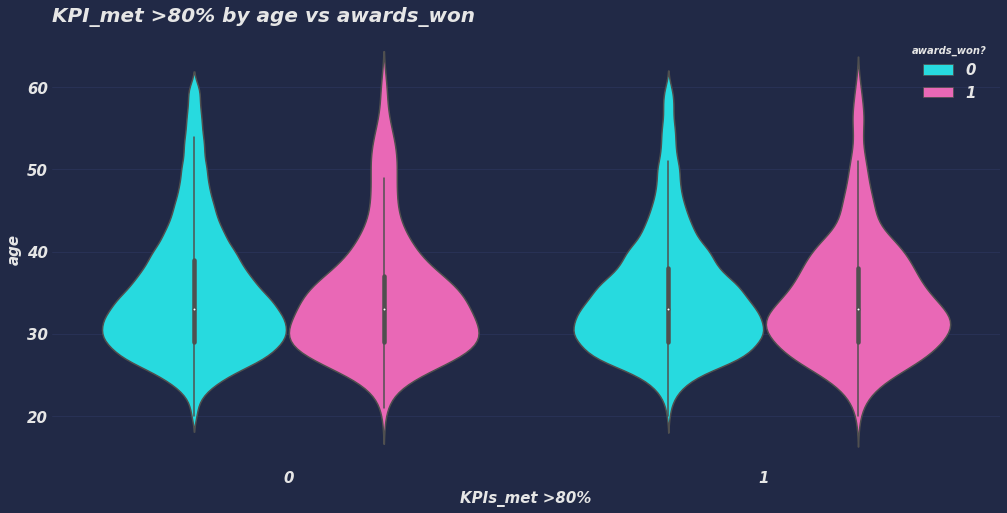

In [32]:
plt.figure(figsize=(17,8))

sns.violinplot(x=train["KPIs_met >80%"], y=train.age, hue=train["awards_won?"], ci=None) 
plt.title("KPI_met >80% by age vs awards_won") 

Text(0.0, 1.0, 'is_promoted = 1')

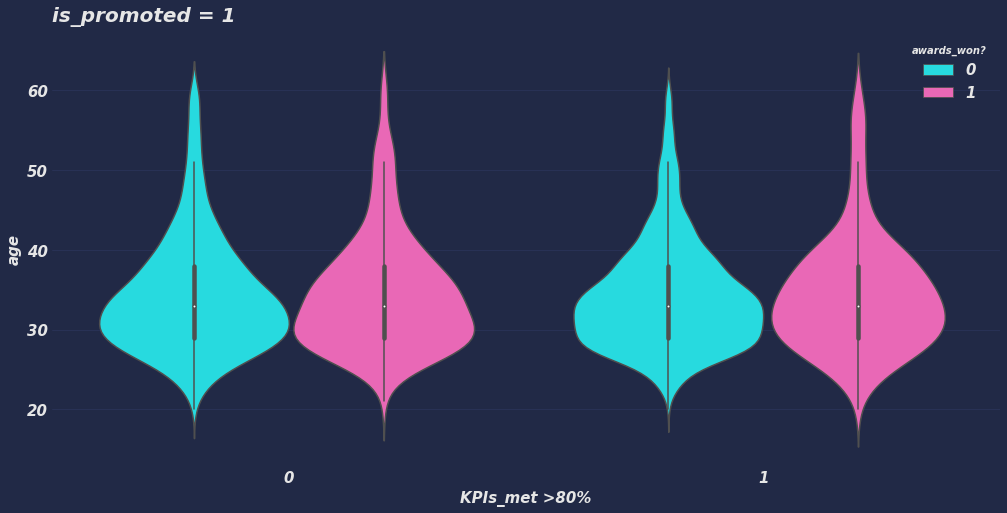

In [35]:
plt.figure(figsize=(17,8))

sns.violinplot(x="KPIs_met >80%", y="age", hue="awards_won?", data= train.query("is_promoted == '1'"), ci=None)
plt.title("is_promoted = 1") 

Text(0.0, 1.0, 'is_promoted = 0')

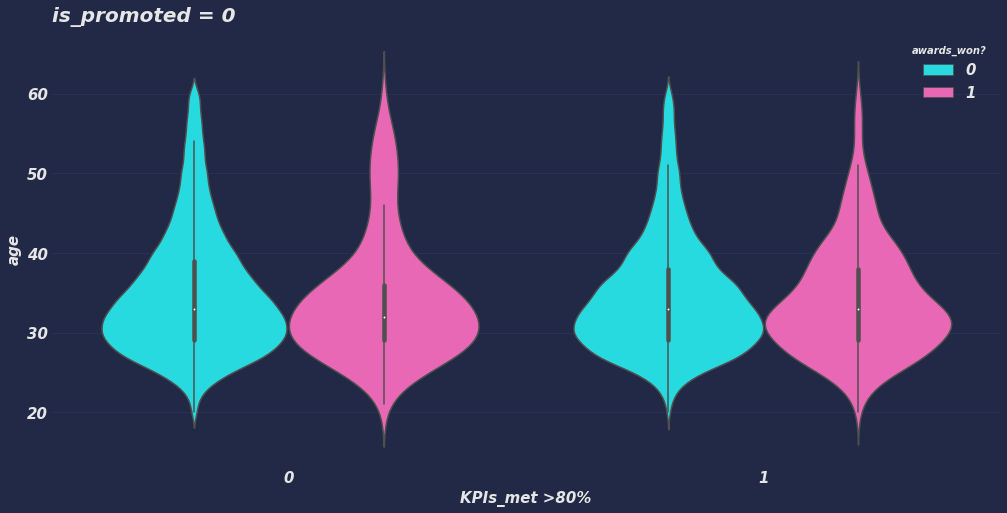

In [36]:
plt.figure(figsize=(17,8))

sns.violinplot(x="KPIs_met >80%", y="age", hue="awards_won?", data= train.query("is_promoted == '0'"), ci=None)
plt.title("is_promoted = 0") 

In [47]:
for i in [train,test]:
    i["new"] = i.groupby(["gender","department", "education"])["avg_training_score"].transform("mean") 

In [49]:
for i in [train,test]: 
    i.drop("employee_id", axis=1, inplace=True) 

In [ ]:
# finnall

In [50]:
train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,new_region,new
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5,8,1,0,49,0,region[1-10],50.404624
1,Operations,Bachelor's,m,other,1,30,5,4,0,0,60,0,region[20-34],60.059865
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0,region[10-20],50.264516
3,Sales & Marketing,Bachelor's,m,other,2,39,1,10,0,0,50,0,region[20-34],50.264516
4,Technology,Bachelor's,m,other,1,45,3,2,0,0,73,0,region[20-34],79.938328


In [51]:
print(train.shape)
print(test.shape)
print(" ")
print(train.duplicated().any().sum())
print(" ")
print(train.isnull().any().sum())
print(test.isnull().any().sum())

(54808, 14)
(23490, 13)
 
1
 
0
0


In [52]:
train.to_csv("train_HR_analytics(clean).csv",index=False)
test.to_csv("test_HR_analytics(clean).csv",index=False)